# PROYECTO INTEGRADOR DA-FT10

# AVANCE 1
# CARGA Y TRANSFORMACION DE DATOS

----------------------------------

### CARGAMOS LIBRERIAS

In [1]:
import pandas as pd
import numpy as np

 se lee el documento "Readme.txt" 

CARGA DE ARCHIVO

In [2]:
data_latino = "C:/Users/ELITE PADEL/Documents/DATA ANALYST/documentos python/data_latinoamerica.csv"

In [3]:
data = pd.read_csv (data_latino)                    # asigno el archivo a mi "data"

In [4]:
data.head(10)                                       # se visualizan las primeras n  columnas especificadas

location_key        date country_code country_name  new_confirmed  \
0           AR  2020-01-01           AR    Argentina            3.0   
1           AR  2020-01-02           AR    Argentina           14.0   
2           AR  2020-01-03           AR    Argentina            3.0   
3           AR  2020-01-04           AR    Argentina            7.0   
4           AR  2020-01-05           AR    Argentina            5.0   
5           AR  2020-01-06           AR    Argentina            9.0   
6           AR  2020-01-07           AR    Argentina            4.0   
7           AR  2020-01-08           AR    Argentina            3.0   
8           AR  2020-01-09           AR    Argentina            0.0   
9           AR  2020-01-10           AR    Argentina            1.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   
5           0.0                  41.0                  0.0   
6           0.0                  45.0                  0.0   
7           0.0                  48.0                  0.0   
8           0.0                  48.0                  0.0   
9           0.0                  49.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                                    NaN  44938712.0  ...   
3                                    NaN  44938712.0  ...   
4                                    NaN  44938712.0  ...   
5                                    NaN  44938712.0  ...   
6                                    NaN  44938712.0  ...   
7                                    NaN  44938712.0  ...   
8                                    NaN  44938712.0  ...   
9                                    NaN  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   
5               15057273.0         2690269.0           55032.0   
6               15057273.0         2690269.0           55032.0   
7               15057273.0         2690269.0           55032.0   
8               15057273.0         2690269.0           55032.0   
9               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   
5            76.52                    147.086                       79.483   
6            76.52                    147.086                       79.483   
7            76.52                    147.086                       79.483   
8            76.52                    147.086                       79.483   
9            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8  

### COMPROBACION REGISTROS Y COLUMNAS

In [5]:
print(data.shape)

(12216057, 50)


### PAISES DONDE SE EXPANDIRA LA COMPAÑIA

In [6]:
paises_unicos=data['country_name'].unique()                     # verificar como se encuentran escritos los paises para escribir que quede bien
print(paises_unicos)

['Argentina' 'Bolivia' 'Brazil' 'Chile' 'Colombia' 'Costa Rica' 'Cuba'
 'Dominican Republic' 'Ecuador' 'Guatemala' 'Honduras' 'Mexico'
 'Nicaragua' 'Panama' 'Peru' 'Puerto Rico' 'Paraguay' 'El Salvador'
 'Uruguay' 'Venezuela']


In [7]:
paises_seleccionados=['Argentina','Chile','Colombia','Mexico','Peru','Brazil']
data_latinoamerica=data[data['country_name'].isin(paises_seleccionados)]

In [8]:
print(data_latinoamerica.shape)                                     #  comprobando que tanto disminuye el df

(11970289, 50)


# ELIMINANDO FILAS Y COLUMNAS VACIAS 

In [9]:
print(data_latinoamerica.isnull().sum())                            # determino los valores nulos

location_key                                    0
date                                            0
country_code                                    0
country_name                                    0
new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population                                 521266
population_male                           1122803
population_female                         1122803
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
population_age_00_09                      1465689
population_age_10_19                      1465689
population_age_20_29                      1465689
population_age_30_39                      1465689


In [10]:
data_latinoamerica_paises=data_latinoamerica[data_latinoamerica['location_key'].isin(['AR','CL','CO','MX','PE','BR'])]       # Filto los paises seleccionados
data_latinoamerica_paises.shape 

(5946, 50)

# FILTRADO POR FECHAS MAYORES A 2021 - 01 - 01

In [11]:
data_filtrado_por_fecha = data_latinoamerica_paises[data_latinoamerica_paises['date'] > '2021-01-01']

In [12]:
data_filtrado_por_fecha.location_key.value_counts()                                 #  Procedo a revisar con value_counts 

location_key
AR    624
BR    624
CL    624
CO    624
MX    624
PE    624
Name: count, dtype: int64

# DETERMINO LA CANTIDAD DE NULOS

In [13]:
valores_nulos_data = data_filtrado_por_fecha.isnull().sum()[data_filtrado_por_fecha.isnull().sum()>0]
print(valores_nulos_data)
print(np.shape(data_filtrado_por_fecha))

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64
(3744, 50)


In [14]:
data_filtrado_por_fecha.new_confirmed.mean() #promedio de nulos en nuevos casos confirmados 

np.float64(13936.279613215149)

In [16]:
for pais in paises_seleccionados:

    data_filtrado_por_fecha.loc[data_filtrado_por_fecha['country_name']==pais, 'new_confirmed']=data_filtrado_por_fecha.loc[data_filtrado_por_fecha['country_name']==pais,'new_confirmed'].fillna(round(data_filtrado_por_fecha.loc[data_filtrado_por_fecha['country_name']==pais,'new_confirmed'].mean())) #redondea el resultado a entero
    data_filtrado_por_fecha.loc[data_filtrado_por_fecha['country_name']==pais, 'new_deceased']=data_filtrado_por_fecha.loc[data_filtrado_por_fecha['country_name']==pais,'new_deceased'].fillna(data_filtrado_por_fecha.loc[data_filtrado_por_fecha['country_name']==pais,'new_deceased'].mean())
    data_filtrado_por_fecha.loc[data_filtrado_por_fecha['country_name']==pais, 'cumulative_confirmed']=data_filtrado_por_fecha.loc[data_filtrado_por_fecha['country_name']==pais,'cumulative_confirmed'].fillna(data_filtrado_por_fecha.loc[data_filtrado_por_fecha['country_name']==pais,'cumulative_confirmed'].mean())
    data_filtrado_por_fecha.loc[data_filtrado_por_fecha['country_name']==pais, 'cumulative_deceased']=data_filtrado_por_fecha.loc[data_filtrado_por_fecha['country_name']==pais,'cumulative_deceased'].fillna(data_filtrado_por_fecha.loc[data_filtrado_por_fecha['country_name']==pais,'cumulative_deceased'].mean())
    data_filtrado_por_fecha.loc[data_filtrado_por_fecha['country_name']==pais, 'rainfall_mm']=data_filtrado_por_fecha.loc[data_filtrado_por_fecha['country_name']==pais,'rainfall_mm'].fillna(data_filtrado_por_fecha.loc[data_filtrado_por_fecha['country_name']==pais,'rainfall_mm'].mean())
    data_filtrado_por_fecha.loc[data_filtrado_por_fecha['country_name']==pais, 'relative_humidity']=data_filtrado_por_fecha.loc[data_filtrado_por_fecha['country_name']==pais,'relative_humidity'].fillna(data_filtrado_por_fecha.loc[data_filtrado_por_fecha['country_name']==pais,'relative_humidity'].mean())
    data_filtrado_por_fecha.loc[data_filtrado_por_fecha['country_name']==pais, 'average_temperature_celsius']=data_filtrado_por_fecha.loc[data_filtrado_por_fecha['country_name']==pais,'average_temperature_celsius'].fillna(data_filtrado_por_fecha.loc[data_filtrado_por_fecha['country_name']==pais,'average_temperature_celsius'].mean())
    data_filtrado_por_fecha.loc[data_filtrado_por_fecha['country_name']==pais, 'minimum_temperature_celsius']=data_filtrado_por_fecha.loc[data_filtrado_por_fecha['country_name']==pais,'minimum_temperature_celsius'].fillna(data_filtrado_por_fecha.loc[data_filtrado_por_fecha['country_name']==pais,'minimum_temperature_celsius'].mean())
    data_filtrado_por_fecha.loc[data_filtrado_por_fecha['country_name']==pais, 'maximum_temperature_celsius']=data_filtrado_por_fecha.loc[data_filtrado_por_fecha['country_name']==pais,'maximum_temperature_celsius'].fillna(data_filtrado_por_fecha.loc[data_filtrado_por_fecha['country_name']==pais,'maximum_temperature_celsius'].mean())

    #rellenado de Nan con el valor cero en las siguientes columnas:
    data_filtrado_por_fecha.loc[:,'new_recovered']=data_filtrado_por_fecha['new_recovered'].fillna(0)
    data_filtrado_por_fecha.loc[:, 'cumulative_recovered']=data_filtrado_por_fecha['cumulative_recovered'].fillna(0)
    data_filtrado_por_fecha.loc[:, 'cumulative_vaccine_doses_administered']=data_filtrado_por_fecha['cumulative_vaccine_doses_administered'].fillna(0)

In [17]:
print(data_filtrado_por_fecha.isnull().sum()[data_filtrado_por_fecha.isnull().sum()>0])             #  verifico los nulos
print(np.shape(data_filtrado_por_fecha))

Series([], dtype: int64)
(3744, 50)


# GUARDO ARCHIVO PARA MEJORAMIENTO EN EL PROCESO DE EJECUCION

In [18]:
data_filtrado_por_fecha.to_csv("Datos_Finales_Filtrado.csv", index= False)

In [6]:
info_nueva_filtrada = "C:/Users/ELITE PADEL/Documents/DATA ANALYST/documentos python/Datos_Finales_Filtrado.csv"

In [7]:
data_nuevo_latinoamerica = pd.read_csv(info_nueva_filtrada)

In [21]:
data_nuevo_latinoamerica

location_key        date country_code country_name  new_confirmed  \
0              AR  2021-01-02           AR    Argentina         7767.0   
1              AR  2021-01-03           AR    Argentina         4934.0   
2              AR  2021-01-04           AR    Argentina        13953.0   
3              AR  2021-01-05           AR    Argentina        14085.0   
4              AR  2021-01-06           AR    Argentina        14496.0   
...           ...         ...          ...          ...            ...   
3739           PE  2022-09-13           PE         Peru         1150.0   
3740           PE  2022-09-14           PE         Peru         5032.0   
3741           PE  2022-09-15           PE         Peru         5032.0   
3742           PE  2022-09-16           PE         Peru         5032.0   
3743           PE  2022-09-17           PE         Peru         5032.0   

      new_deceased  cumulative_confirmed  cumulative_deceased  \
0       166.000000          1.670634e+06         46688.000000   
1       157.000000          1.675568e+06         46845.000000   
2       157.000000          1.689521e+06         47002.000000   
3       160.000000          1.703606e+06         47162.000000   
4       131.000000          1.718102e+06         47293.000000   
...            ...                   ...                  ...   
3739     22.000000          4.127612e+06        216173.000000   
3740    197.233871          2.576906e+06        188954.366129   
3741    197.233871          2.576906e+06        188954.366129   
3742    197.233871          2.576906e+06        188954.366129   
3743    197.233871          2.576906e+06        188954.366129   

      cumulative_vaccine_doses_administered  population  ...  \
0                                   20334.0  44938712.0  ...   
1                                   20529.0  44938712.0  ...   
2                                   25164.0  44938712.0  ...   
3                                   29852.0  44938712.0  ...   
4                                   34162.0  44938712.0  ...   
...                                     ...         ...  ...   
3739                                    0.0  29381884.0  ...   
3740                                    0.0  29381884.0  ...   
3741                                    0.0  29381884.0  ...   
3742                                    0.0  29381884.0  ...   
3743                                    0.0  29381884.0  ...   

      population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0                  15057273.0         2690269.0           55032.0   
1                  15057273.0         2690269.0           55032.0   
2                  15057273.0         2690269.0           55032.0   
3                  15057273.0         2690269.0           55032.0   
4                  15057273.0         2690269.0           55032.0   
...                       ...               ...               ...   
3739               10554712.0         1256339.0           16425.0   
3740               10554712.0         1256339.0           16425.0   
3741               10554712.0         1256339.0           16425.0   
3742               10554712.0         1256339.0           16425.0   
3743               10554712.0         1256339.0           16425.0   

      life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0              76.520                    147.086                       79.483   
1              76.520                    147.086                       79.483   
2              76.520                    147.086                       79.483   
3              76.520                    147.086                       79.483   
4              76.520                    147.086                       79.483   
...               ...                        ...                          ...   
3739           76.516                    146.370                       84.815   
3740           76.516                    146.370                       84.815   
3741    

In [26]:
for i in data_nuevo_latinoamerica.columns:
    print(i)
    print(data_nuevo_latinoamerica[i].describe())
    print('---------------------------------')

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
---------------------------------
date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object
---------------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
---------------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
---------------------------------
new_confirmed
count      3744.000000
mean      13921.908120
std       24219.361907
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
---------------------------------
new_deceased
count     3744.000000
mean       276.887411
std        507.240028
min          0.000000
25%         26.000000
50%        100.50

In [27]:
print(data_nuevo_latinoamerica['country_name'].unique())            # verifico que en la data esten solo los paises determinados para trabajr

['Argentina' 'Brazil' 'Chile' 'Colombia' 'Mexico' 'Peru']


In [24]:
print(data_nuevo_latinoamerica.shape)

(3744, 50)


UTILIZACION DEL BUCLE FOR PARA DETERMINAR CALCULOS ESTADISTICOS

In [29]:
data_nuevo_latinoamerica = data_latinoamerica_paises

In [30]:
def describir_datos(data):
    for i in data.columns:
        if data[i].dtype== 'float64' or data[i].dtype== 'int64':
            print(i)
            print('mediana:',data[i].median())
            print('varianza:',data[i].var())
            print('rango:',data[i].max()-data[i].min())
            print("moda",data[i].mode()[0])
            print('---------------------------------------------')

describir_datos(data_latinoamerica_paises)

new_confirmed
mediana: 4017.0
varianza: 425590278.046514
rango: 298981.0
moda 0.0
---------------------------------------------
new_deceased
mediana: 108.0
varianza: 196439.53146511223
rango: 11447.0
moda 0.0
---------------------------------------------
cumulative_confirmed
mediana: 2123737.0
varianza: 49426883938627.11
rango: 34568833.0
moda 0.0
---------------------------------------------
cumulative_deceased
mediana: 83596.0
varianza: 27771591862.60344
rango: 685203.0
moda 0.0
---------------------------------------------
cumulative_vaccine_doses_administered
mediana: 42039612.0
varianza: 9181669571909644.0
rango: 347868463.0
moda 209673612.0
---------------------------------------------
population
mediana: 47910798.0
varianza: 4507032513124198.0
rango: 194985406.0
moda 17574003.0
---------------------------------------------
population_male
mediana: 22254165.0
varianza: 1101130994899747.8
rango: 95463769.0
moda 8972014.0
---------------------------------------------
population_fem

In [31]:
data_latinoamerica_paises

location_key        date country_code country_name  new_confirmed  \
0                  AR  2020-01-01           AR    Argentina            3.0   
1                  AR  2020-01-02           AR    Argentina           14.0   
2                  AR  2020-01-03           AR    Argentina            3.0   
3                  AR  2020-01-04           AR    Argentina            7.0   
4                  AR  2020-01-05           AR    Argentina            5.0   
...               ...         ...          ...          ...            ...   
10253872           PE  2022-09-13           PE         Peru         1150.0   
10253873           PE  2022-09-14           PE         Peru            NaN   
10253874           PE  2022-09-15           PE         Peru            NaN   
10253875           PE  2022-09-16           PE         Peru            NaN   
10253876           PE  2022-09-17           PE         Peru            NaN   

          new_deceased  cumulative_confirmed  cumulative_deceased  \
0                  0.0                   3.0                  0.0   
1                  0.0                  17.0                  0.0   
2                  0.0                  20.0                  0.0   
3                  0.0                  27.0                  0.0   
4                  0.0                  32.0                  0.0   
...                ...                   ...                  ...   
10253872          22.0             4127612.0             216173.0   
10253873           NaN                   NaN                  NaN   
10253874           NaN                   NaN                  NaN   
10253875           NaN                   NaN                  NaN   
10253876           NaN                   NaN                  NaN   

          cumulative_vaccine_doses_administered  population  ...  \
0                                           NaN  44938712.0  ...   
1                                           NaN  44938712.0  ...   
2                                           NaN  44938712.0  ...   
3                                           NaN  44938712.0  ...   
4                                           NaN  44938712.0  ...   
...                                         ...         ...  ...   
10253872                                    NaN  29381884.0  ...   
10253873                                    NaN  29381884.0  ...   
10253874                                    NaN  29381884.0  ...   
10253875                                    NaN  29381884.0  ...   
10253876                                    NaN  29381884.0  ...   

          population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0                      15057273.0         2690269.0           55032.0   
1                      15057273.0         2690269.0           55032.0   
2                      15057273.0         2690269.0           55032.0   
3                      15057273.0         2690269.0           55032.0   
4                      15057273.0         2690269.0           55032.0   
...                           ...               ...               ...   
10253872               10554712.0         1256339.0           16425.0   
10253873               10554712.0         1256339.0           16425.0   
10253874               10554712.0         1256339.0           16425.0   
10253875               10554712.0         1256339.0           16425.0   
10253876               10554712.0         1256339.0           16425.0   

          life_expectancy  adult_male_mortality_rate  \
0                  76.520                    147.086   
1                  76.520                    147.086   
2                  76.520                    147.086   
3                  76.520                    147.086   
4                  76.520                    147.086   
...                   ...                        ...   
10253872           76.516                    146.370   
10253873           76.516                    146.370   
10253874           76.516                    

# PREGUNTAS


¿Qué implican estas métricas y cómo pueden ayudar en el análisis de datos?



Rta/ Las metricas que se determinan a realizar son calculos estadisticos que nos dan una aproximacion de la tendencia de los datos.  
toda data sin importar su origen debe tener este tipo de informacion. De este modo podemos obtener insights importantes.

¿Se muestran todas las estadísticas en todas las columnas durante el análisis?

Rta/ los calculos estadisticos que se pueden sacar a una data son considerables.  para el caso del ejercicio se opto por determinar
    mediana, varianza, rango y moda.

¿Cuál es la razón de la respuesta anterior y cómo podría afectar la interpretación de los resultados obtenidos?

Se tomo la decision de sacar los calculos estadisticos descritos anteriormente ya que son los mas comunes y de forma general dan una aproximacion de 
lo que es informacion.



¿Qué representa la mediana?	



Rta/ la mediana es una medida que me representa justo donde esta la mitad de mis datos.

¿Cómo varía la dispersión de los datos en el conjunto de datos analizado, en términos de la varianza y el rango? 

La varianza en esencia indica que tan lejos estan los puntos de los datos de lo que es el promedio de los mismos. Cuando la varianza es alta
indica que los puntos estan muy dispersos de la media. cuando es baja que estan mas cercanos a la media.  En los datos analizados la varianza 
va a ser una medidad que siempre se va a definir dentro del valor del rango.    El rango esta determinado por el valor maximo y minimo que manejo de
los datos.

¿Qué nos puede indicar esto sobre la consistencia o la variabilidad de los datos en relación con la mediana?

La mediana es una medida de tendencia central que es menos sensible a valores atípicos (valores extremos) que la media (promedio). Esto significa que si hay un valor muy alto o muy bajo en el conjunto de datos, la mediana se verá afectada menos que la media.

#                                                                                                                                    AVANCE 2

#                                                           ANALISIS EXPLORATORIO Y VISUALIZACION

---------------------------------------------------

SE CARGAN LAS LIBRERIAS NECESARIAS

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
data_latinoamerica_paises= pd.read_csv("Datos_Finales_Filtrado.csv",sep=',')        # Realizo la lectura de los datos

In [3]:
data_latinoamerica_paises.head(10)                                                          # verifico info de datos

location_key        date country_code country_name  new_confirmed  \
0           AR  2021-01-02           AR    Argentina         7767.0   
1           AR  2021-01-03           AR    Argentina         4934.0   
2           AR  2021-01-04           AR    Argentina        13953.0   
3           AR  2021-01-05           AR    Argentina        14085.0   
4           AR  2021-01-06           AR    Argentina        14496.0   
5           AR  2021-01-07           AR    Argentina        13722.0   
6           AR  2021-01-08           AR    Argentina        13932.0   
7           AR  2021-01-09           AR    Argentina         9959.0   
8           AR  2021-01-10           AR    Argentina         5174.0   
9           AR  2021-01-11           AR    Argentina        13076.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0         166.0             1670634.0              46688.0   
1         157.0             1675568.0              46845.0   
2         157.0             1689521.0              47002.0   
3         160.0             1703606.0              47162.0   
4         131.0             1718102.0              47293.0   
5         160.0             1731824.0              47453.0   
6         162.0             1745756.0              47615.0   
7         158.0             1755715.0              47773.0   
8         165.0             1760889.0              47938.0   
9         170.0             1773965.0              48108.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                20334.0  44938712.0  ...   
1                                20529.0  44938712.0  ...   
2                                25164.0  44938712.0  ...   
3                                29852.0  44938712.0  ...   
4                                34162.0  44938712.0  ...   
5                                42092.0  44938712.0  ...   
6                                54090.0  44938712.0  ...   
7                                58552.0  44938712.0  ...   
8                                59043.0  44938712.0  ...   
9                                67496.0  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   
5               15057273.0         2690269.0           55032.0   
6               15057273.0         2690269.0           55032.0   
7               15057273.0         2690269.0           55032.0   
8               15057273.0         2690269.0           55032.0   
9               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   
5            76.52                    147.086                       79.483   
6            76.52                    147.086                       79.483   
7            76.52                    147.086                       79.483   
8            76.52                    147.086                       79.483   
9            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            0.0   
1                      26.6                        15.8            0.0   
2                      26.6                        15.8  

In [48]:
data_latinoamerica_paises.describe()                        # esta funcion genera un resumen de los datos estadisticos contenidos 
#                                                           proporcionando asi una vision rapida de los datos.

new_confirmed  new_deceased  cumulative_confirmed  cumulative_deceased  \
count    3744.000000   3744.000000          3.744000e+03          3744.000000   
mean    13921.908120    276.887411          6.777074e+06        192957.902075   
std     24219.361907    507.240028          7.989269e+06        182798.790565   
min      -573.000000      0.000000          9.710000e+02             1.000000   
25%      1536.750000     26.000000          2.132216e+06         59255.750000   
50%      5214.000000    100.500000          3.632144e+06        139614.000000   
75%     14834.000000    312.000000          6.223497e+06        214939.500000   
max    298408.000000  11447.000000          3.456883e+07        685203.000000   

       cumulative_vaccine_doses_administered    population  population_male  \
count                           3.744000e+03  3.744000e+03     3.744000e+03   
mean                            6.544474e+07  7.772147e+07     3.787035e+07   
std                             9.247680e+07  6.713776e+07     3.318494e+07   
min                             0.000000e+00  1.757400e+07     8.972014e+06   
25%                             2.618297e+06  2.938188e+07     1.445076e+07   
50%                             3.244576e+07  4.791080e+07     2.225416e+07   
75%                             7.478108e+07  1.109920e+08     5.485523e+07   
max                             3.478685e+08  2.125594e+08     1.044358e+08   

       population_female  population_rural  population_urban  ...  \
count       3.744000e+03      3.744000e+03      3.744000e+03  ...   
mean        3.927162e+07      1.255498e+07      6.833931e+07  ...   
std         3.448407e+07      1.008074e+07      5.829529e+07  ...   
min         8.601989e+06      2.341903e+06      1.661014e+07  ...   
25%         1.493113e+07      3.599141e+06      2.539034e+07  ...   
50%         2.324582e+07      8.316128e+06      4.108344e+07  ...   
75%         5.748131e+07      2.494867e+07      1.026269e+08  ...   
max         1.081236e+08      2.780789e+07      1.832416e+08  ...   

       population_largest_city  area_rural_sq_km  area_urban_sq_km  \
count             3.744000e+03      3.744000e+03       3744.000000   
mean              1.443888e+07      2.636580e+06      59502.500000   
std               5.710077e+06      2.584740e+06      45125.320206   
min               6.723516e+06      7.094180e+05      12027.000000   
25%               1.055471e+07      1.090598e+06      16425.000000   
50%               1.291832e+07      1.543881e+06      45582.000000   
75%               2.167191e+07      2.690269e+06     102418.000000   
max               2.184651e+07      8.241430e+06     134981.000000   

       life_expectancy  adult_male_mortality_rate  \
count      3744.000000                3744.000000   
mean         76.808500                 154.274667   
std           1.597394                  27.000146   
min          74.992000                 107.669000   
25%          75.672000                 146.370000   
50%          76.518000                 149.351000   
75%          77.109000                 184.379000   
max          80.042000                 188.528000   

       adult_female_mortality_rate  pollution_mortality_rate  \
count                  3744.000000               3744.000000   
mean                     81.428000                 36.566667   
std                      11.800623                 13.027569   
min                      59.035000                 25.300000   
25%                      77.999000                 26.600000   
50%                      82.149000                 33.300000   
75%                      91.421000                 37.000000   
max                      95.815000                 63.900000   

       comorbidity_mortality_rate  new_recovered  cumulative_recovered  
count                 3744.000000    3744.000000          3.744000e+03  
mean                    14.816667    8263.612179          3.894398e+06  
std                      1.665972   23

In [49]:
data_latinoamerica_paises.info()                                    # determino lo info mas relevante. dentro de ello el formato de mi columna 'date'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3744 non-null   object 
 1   date                                   3744 non-null   object 
 2   country_code                           3744 non-null   object 
 3   country_name                           3744 non-null   object 
 4   new_confirmed                          3744 non-null   float64
 5   new_deceased                           3744 non-null   float64
 6   cumulative_confirmed                   3744 non-null   float64
 7   cumulative_deceased                    3744 non-null   float64
 8   cumulative_vaccine_doses_administered  3744 non-null   float64
 9   population                             3744 non-null   float64
 10  population_male                        3744 non-null   float64
 11  popu

La tabla anterior me permite visualizar que mi columna 'date' esta como formato 'object' y la necesito en formato 'date' para realizar
los analisis en el tiempo.

In [4]:
data_latinoamerica_paises['date']=pd.to_datetime(data_latinoamerica_paises['date']) 
data_latinoamerica_paises.set_index('date',inplace=True) 

In [51]:
data_latinoamerica_paises.index

DatetimeIndex(['2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
               '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09',
               '2021-01-10', '2021-01-11',
               ...
               '2022-09-08', '2022-09-09', '2022-09-10', '2022-09-11',
               '2022-09-12', '2022-09-13', '2022-09-14', '2022-09-15',
               '2022-09-16', '2022-09-17'],
              dtype='datetime64[ns]', name='date', length=3744, freq=None)

Determino las estadisticas basicas de los datos utilizando "for"

In [5]:
for i in data_latinoamerica_paises.columns:
    print(i)
    print(data_latinoamerica_paises[i].describe())
    print('-------------------------------------')

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
-------------------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
-------------------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
-------------------------------------
new_confirmed
count      3744.000000
mean      13921.908120
std       24219.361907
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
-------------------------------------
new_deceased
count     3744.000000
mean       276.887411
std        507.240028
min          0.000000
25%         26.000000
50%        100.500000
75%        312.000000
max      11447.000000
Name: new_deceased, dtype: float64
-------------------------------------
cumulative_

SE PROCEDE A CREAR LA MATRIZ DE CORRELACION

In [53]:
numeric_columns = data_latinoamerica_paises.select_dtypes (include=['float64','int64']).columns
correlacion_matrix = data_latinoamerica_paises[numeric_columns].corr()

In [54]:
mask = np.triu(np.ones_like(correlacion_matrix,dtype= bool))                    # se crea mascara para el triangulo superior

In [55]:
correlacion_matrix = correlacion_matrix[abs(correlacion_matrix) > abs (0.5)]    # se determina mostrar los valores superiores a 0.5
 #                                                                                  de modo que se determine una correlacion fuerte. Tener 
 #                                                                                  en cuenta que tambien se pueden mostrar valores negativos.

MATRIZ DE CORRELACION

La matriz a contiuancion representa la correlacion entre dos varialbes diferentes.  esto permite determinar la proporcionalidad de una con otra variable.
asi mismo a partir de esta mirar que graficos se pueden hacer para encontrar insights o tendencias relevantes.     El valor en el cuadro indica el
coeficiente de relacion entre ambas.  entre mas cercano el valor a uno (1), mayor es la correlacion entre ambas variables.

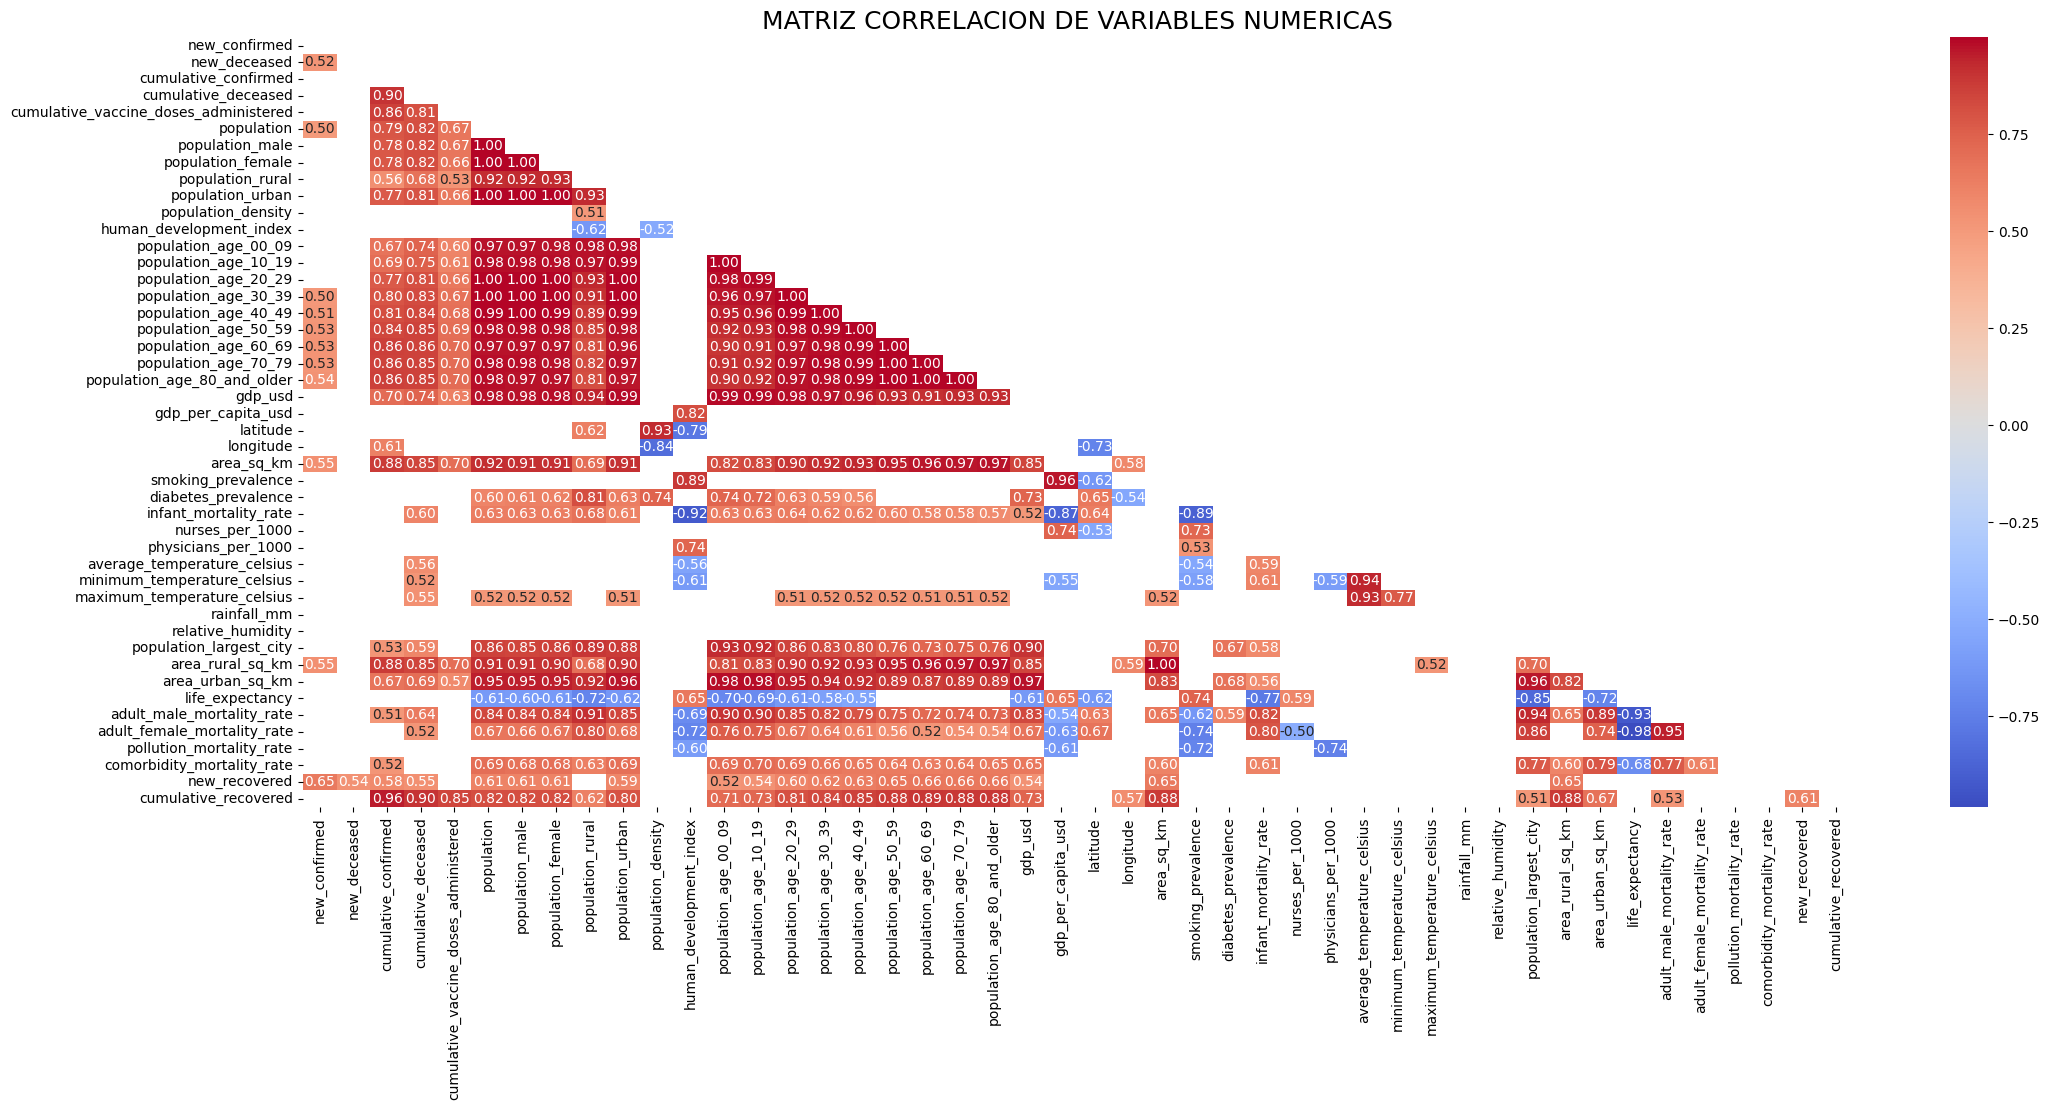

In [56]:
plt.figure(figsize=(25,10))
sns.heatmap(correlacion_matrix,mask=mask,annot=True,cmap='coolwarm',fmt=".2f")
plt.title ('MATRIZ CORRELACION DE VARIABLES NUMERICAS', fontsize= 18)
plt.show()

###  Gráficos de barras ( nuevos confirmados por pais )

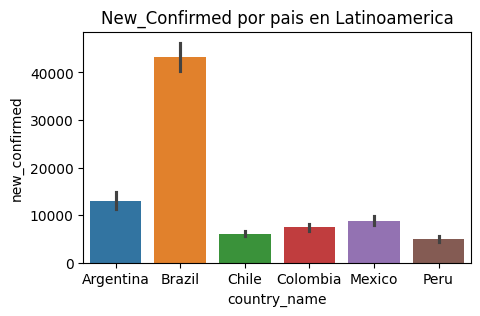

In [59]:
fig, ax=plt.subplots(figsize=(5,3))
sns.barplot(x='country_name', y='new_confirmed', data=data_latinoamerica_paises, ax=ax,hue='country_name')
plt.title('New_Confirmed por pais en Latinoamerica')
plt.show()

#   DIAGRAMA DE BARRAS - COMPARACION POR PAIS DE LAS DIFERENTES VARIABLES

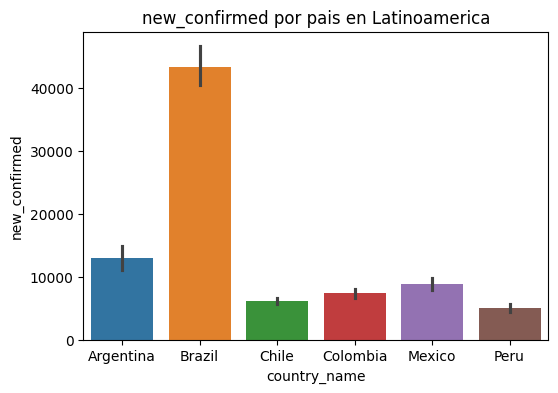

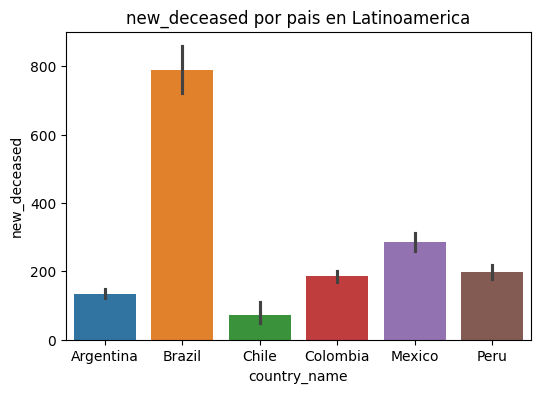

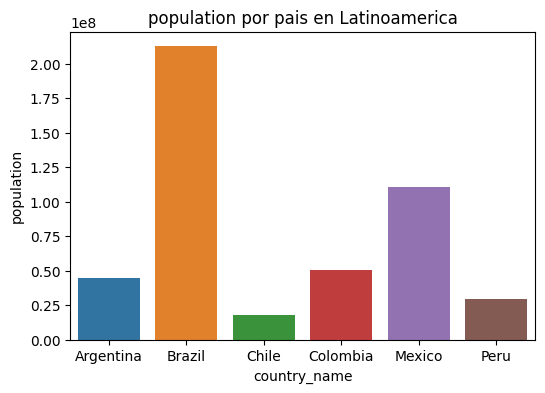

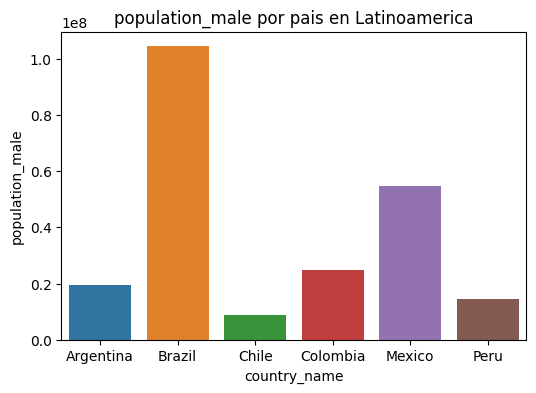

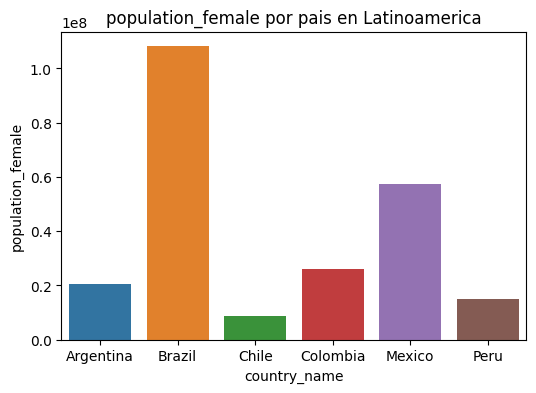

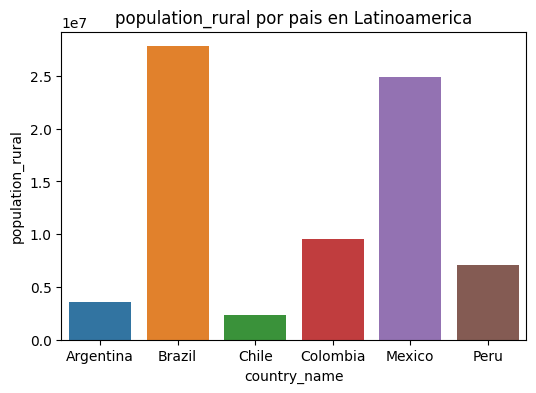

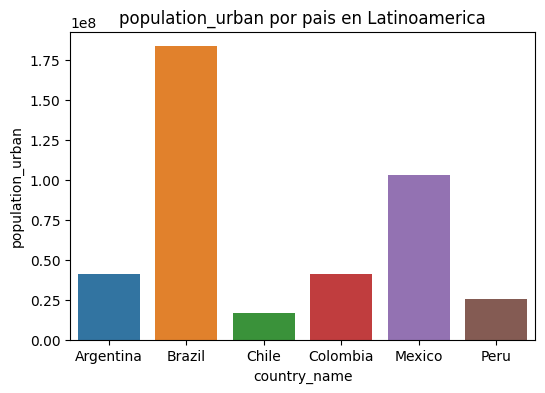

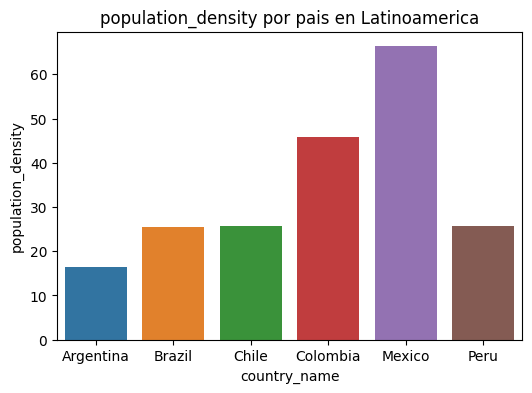

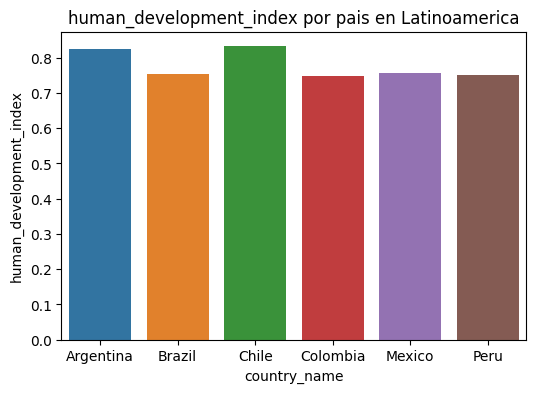

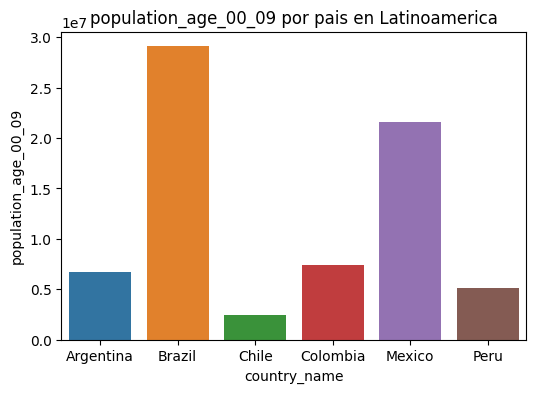

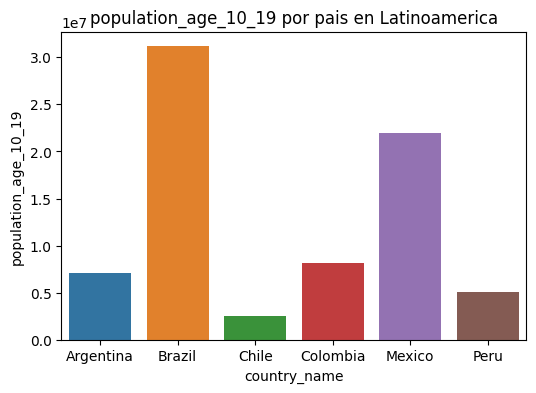

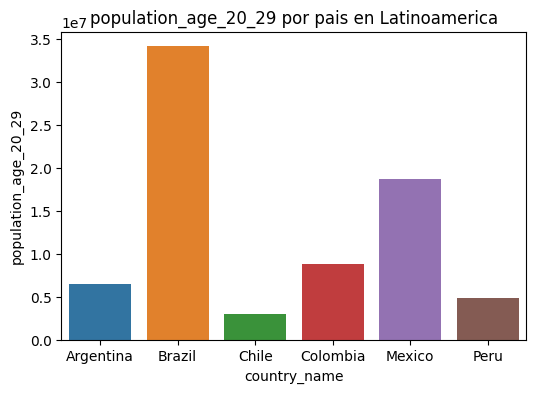

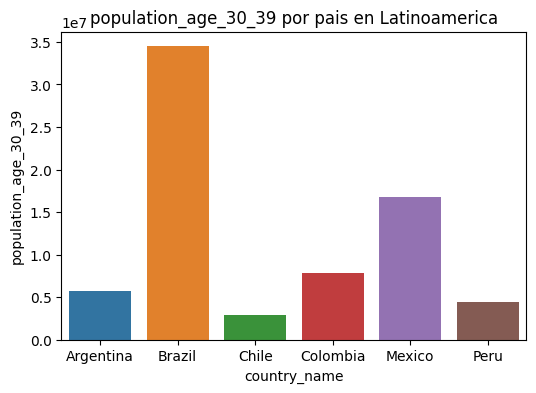

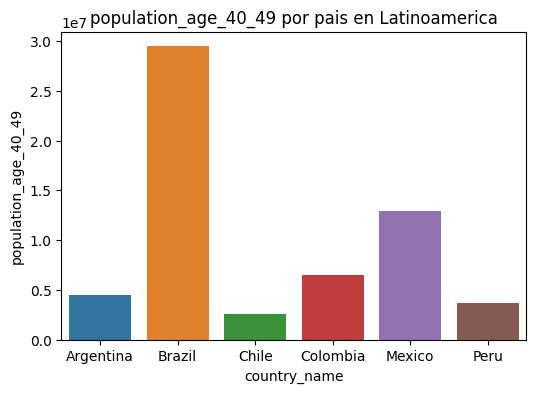

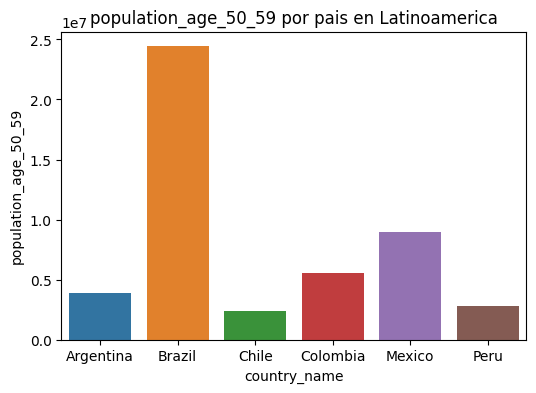

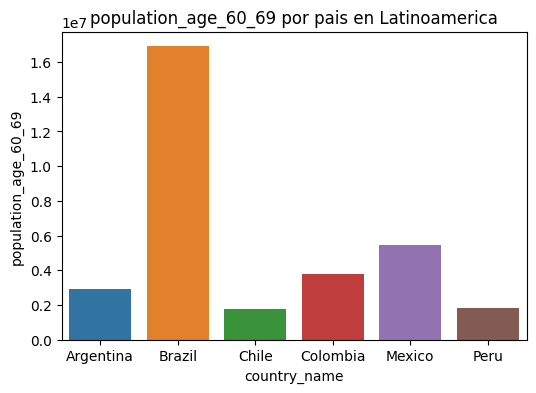

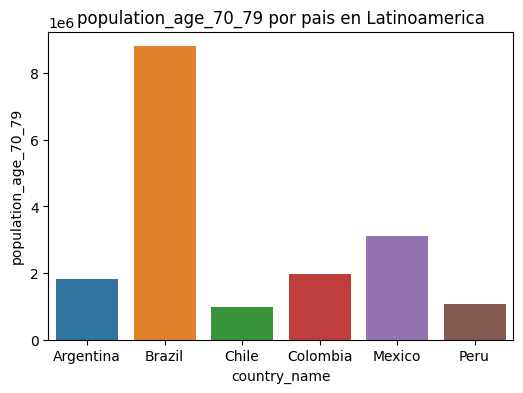

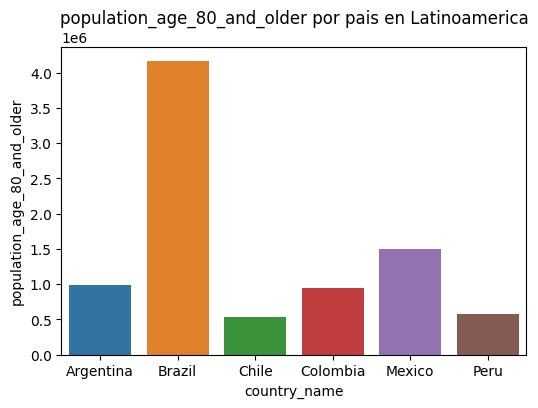

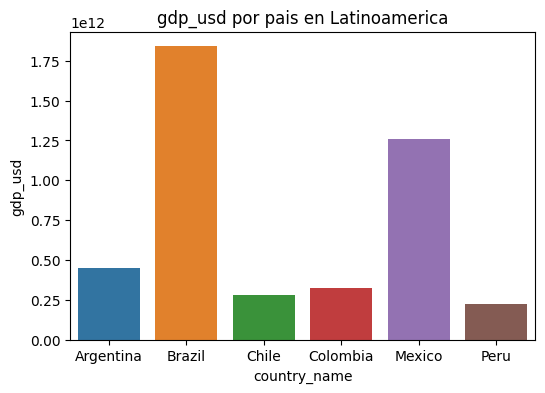

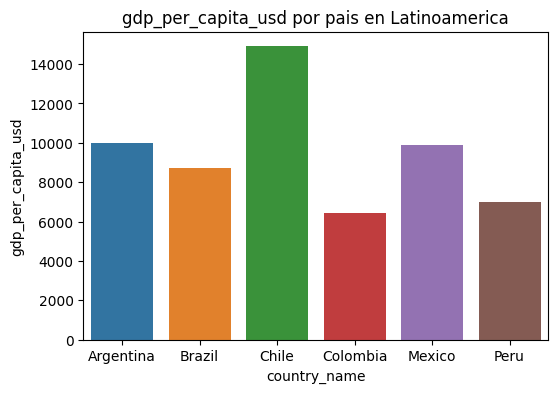

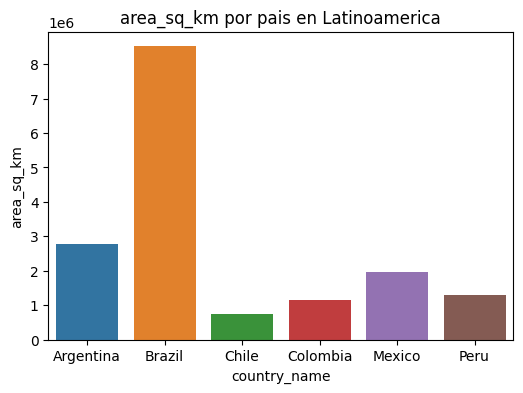

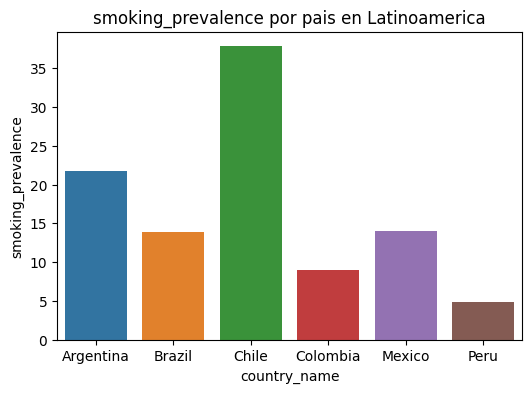

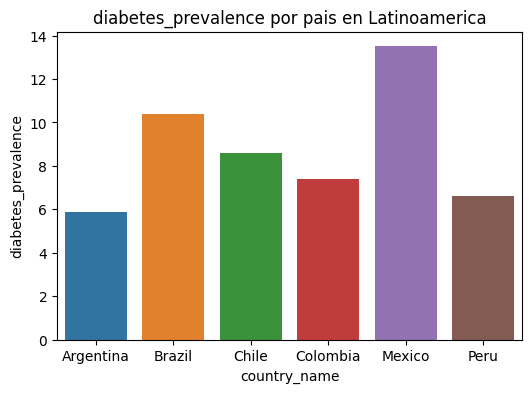

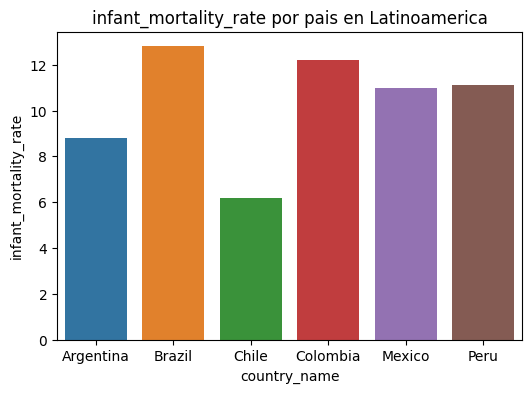

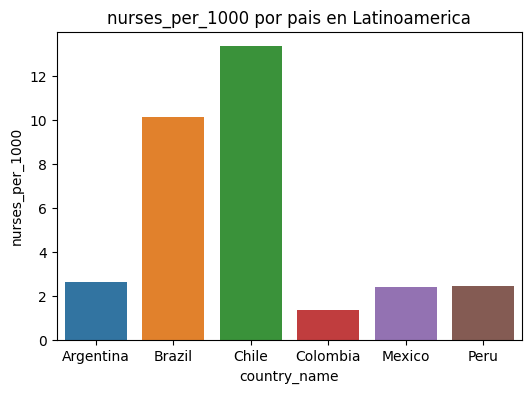

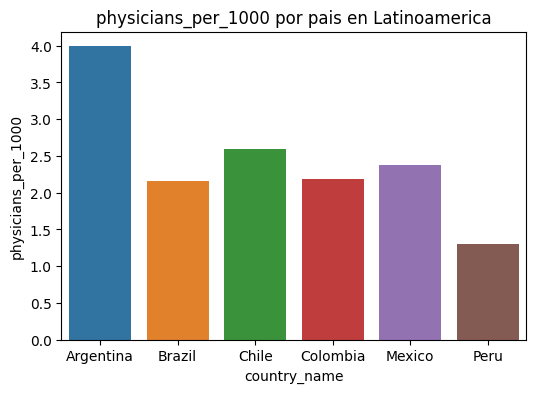

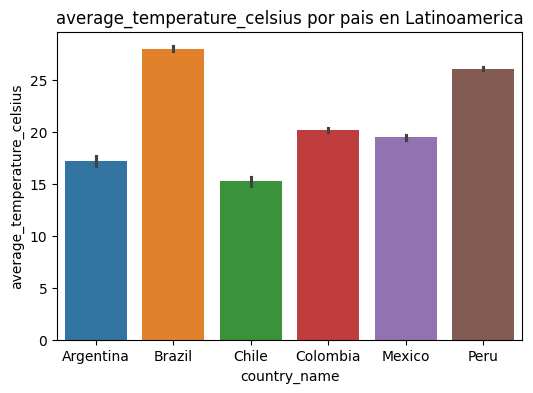

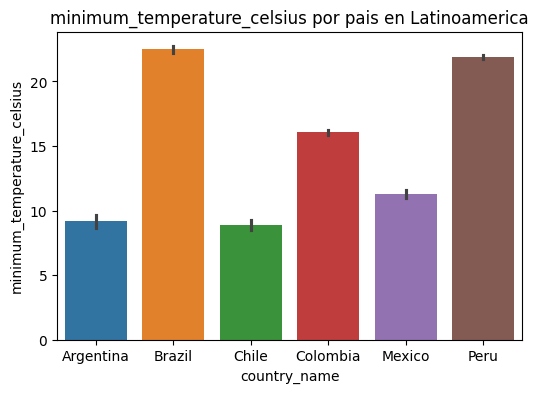

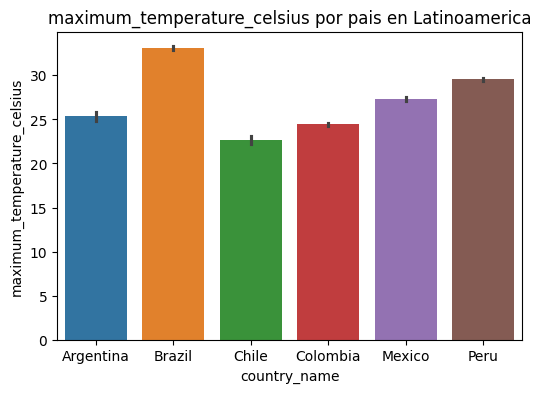

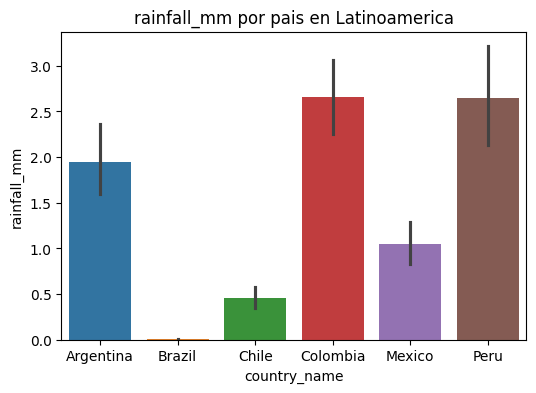

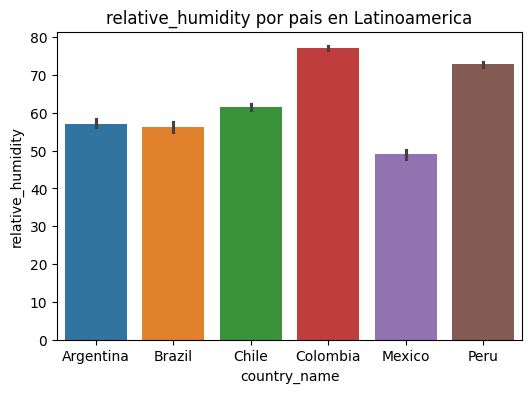

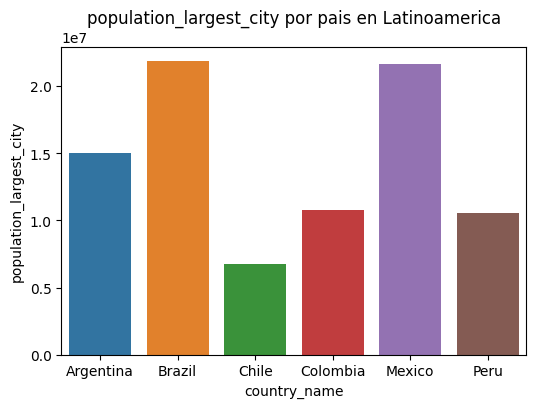

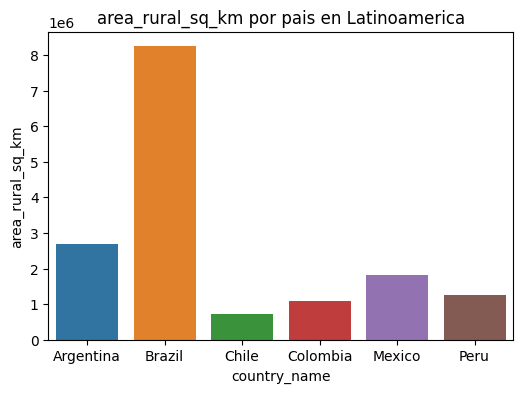

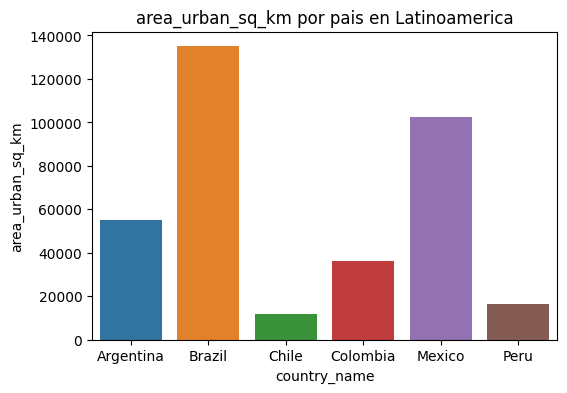

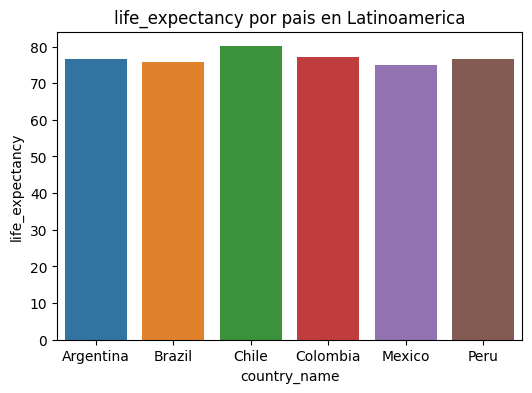

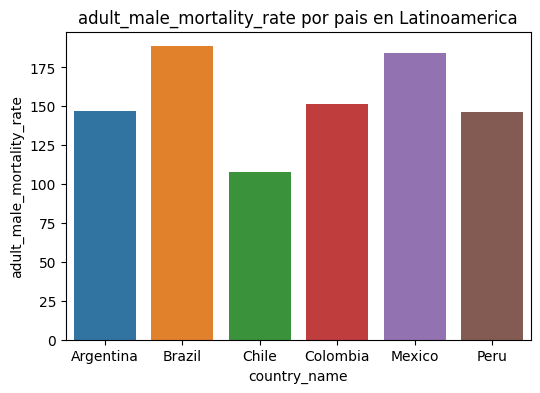

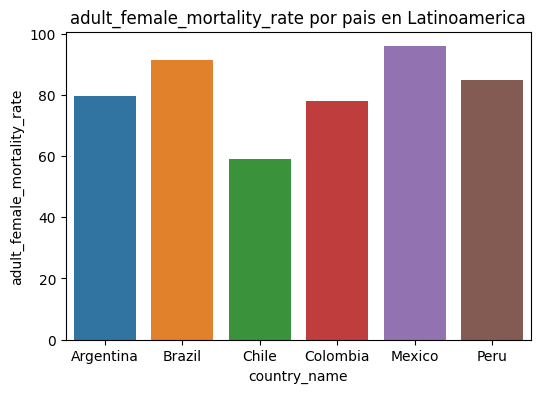

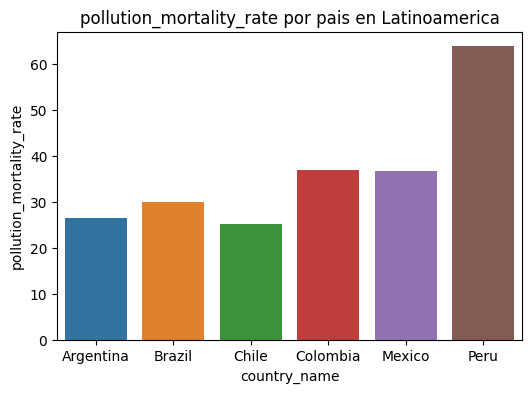

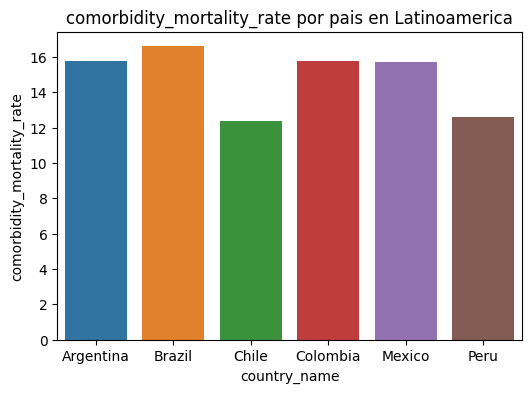

In [61]:
for i in data_latinoamerica_paises.columns:
    if i not in['location_key','date','country_code','country_name','latitude','longitude','cumulative_confirmed','cumulative_deceased','cumulative_recovered','cumulative_vaccine_doses_administered','new_recovered']:
       fig,ax=plt.subplots(figsize=(6,4))
       sns.barplot(x='country_name',y=i,data=data_latinoamerica_paises, ax=ax,hue='country_name')
       plt.title(f'{i} por pais en Latinoamerica')
       plt.show()

# HISTOGRAMA  POR VARIABLES

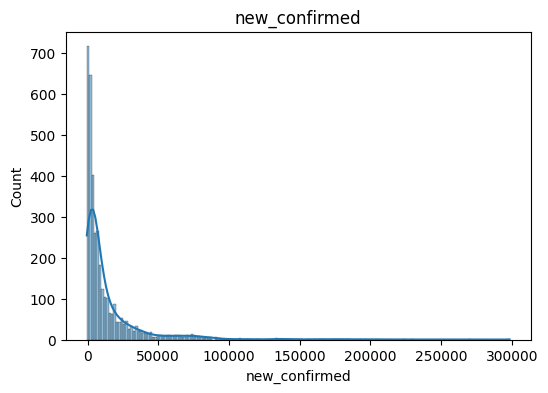

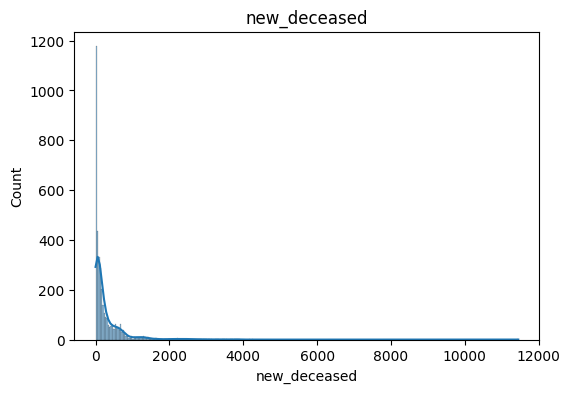

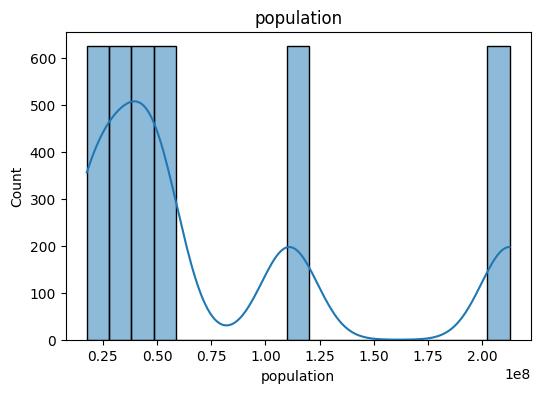

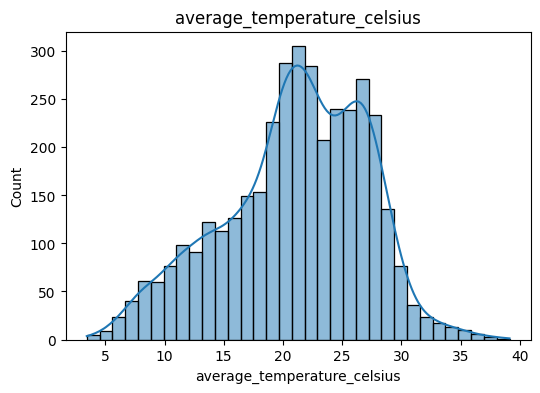

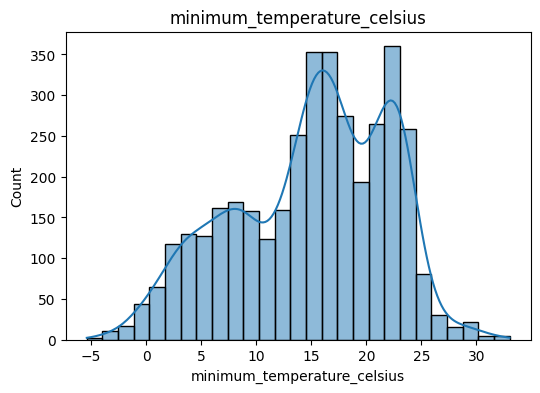

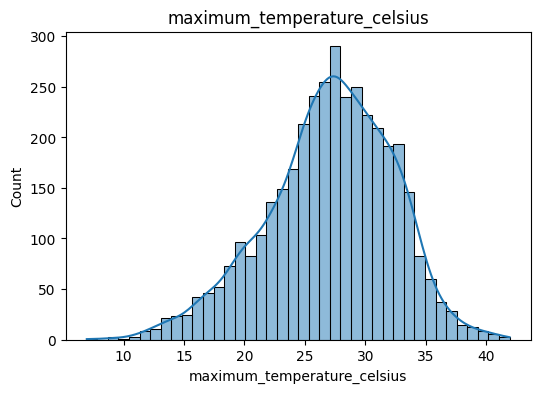

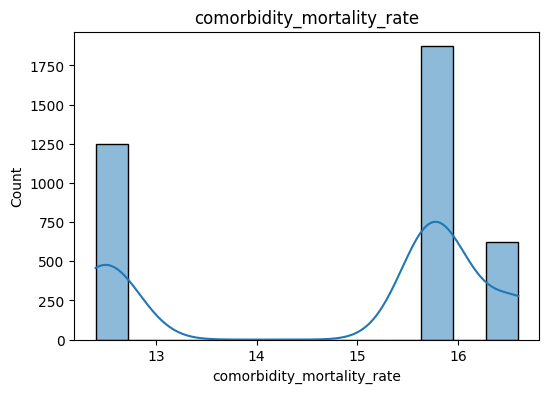

In [ ]:
columnas_seleccion=["new_confirmed","new_deceased","population","cumulative_deceased","cumulative_vaccine_doses_administered","average_temperature_celsius","minimum_temperature_celsius","maximum_temperature_celsius","comorbidity_mortality_rate"]

for i in data_latinoamerica_paises[columnas_seleccion]:             # los histogramas hacer referencia a variables numericas
    if i not in ['location_key','date','country_code','country_name','comorbidity__mortality_rate','longitude','cumulative_confirmed','cumulative_deceased','cumulative_recovered','cumulative_vaccine_doses_administered']:
        fig, ax=plt.subplots(figsize=(6,4))
        sns.histplot(data_latinoamerica_paises[i],kde=True)
        plt.title(i)
        plt.show()

## DIAGRAMA DE DISPERSION - TEMPERATURA VS CASOS CONFIRMADOS

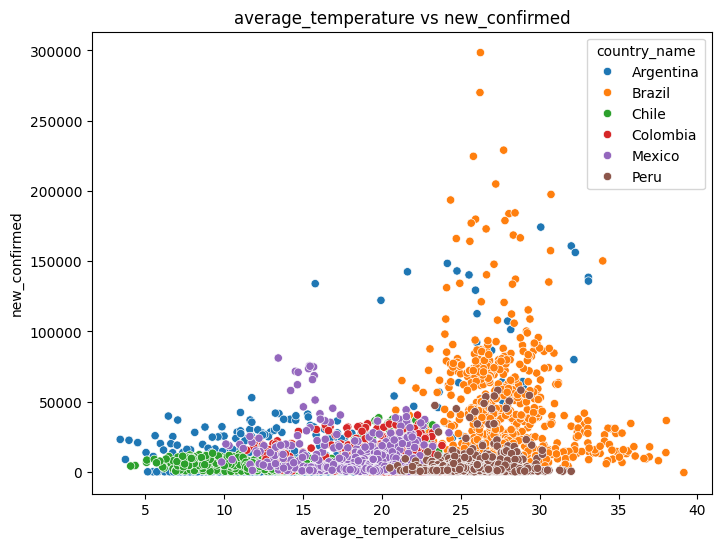

In [70]:
fig,ax=plt.subplots(figsize=(8,6))
sns.scatterplot(x='average_temperature_celsius',y='new_confirmed',data=data_latinoamerica_paises,hue='country_name')
plt.title('average_temperature vs new_confirmed')
plt.show() 

El diagrama muestra que las temperaturas altas se relacionan con la cantidad de casos confirmados. sin embargo es importante revisar la tasa de confirmados vs la poblacion.   obviamente un pais con mas poblacion, posiblemente tenga mas casos.

## DIAGRAMA DE DISPERSION - TEMPERATURA MEDIA VS MUERTES CONFIRMADAS

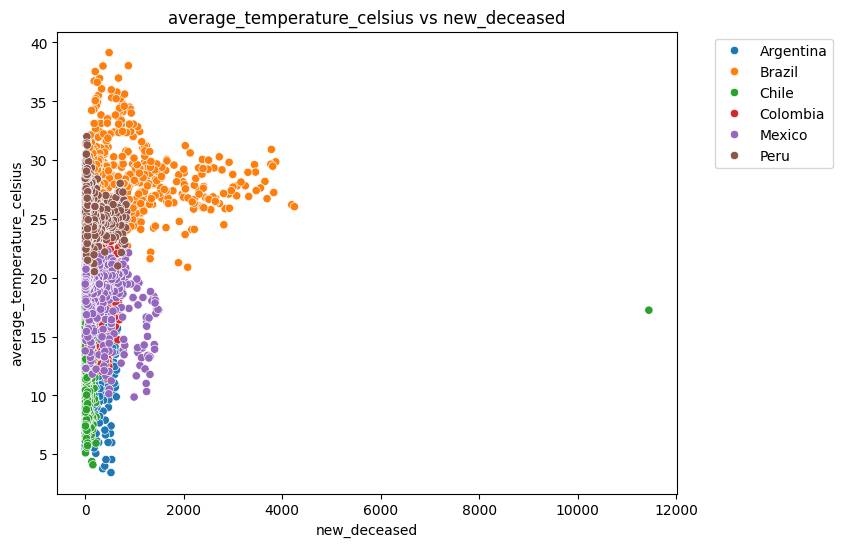

In [71]:
fig,ax=plt.subplots(figsize=(8,6))
sns.scatterplot(x='new_deceased',y='average_temperature_celsius',data=data_latinoamerica_paises,hue='country_name')
plt.title('average_temperature_celsius vs new_deceased')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()

Se evidencia una relacion entre la tempertura promedio y los fallecimientos. Donde a mayor temperatura aumenta el numero de fallecimientos.  Es de 
tener en cuenta que se evidencia tambien una cantidad considerable de muertes aun siendo que la tamperatura promedio no es tan alta.  Seria tema
de revisar a lo largo del tiempo de como fue el manejo particular que cada pais dio a la pandemia.

## COMPORTAMIENTO DOSIS ADMINISTRADAS X MES

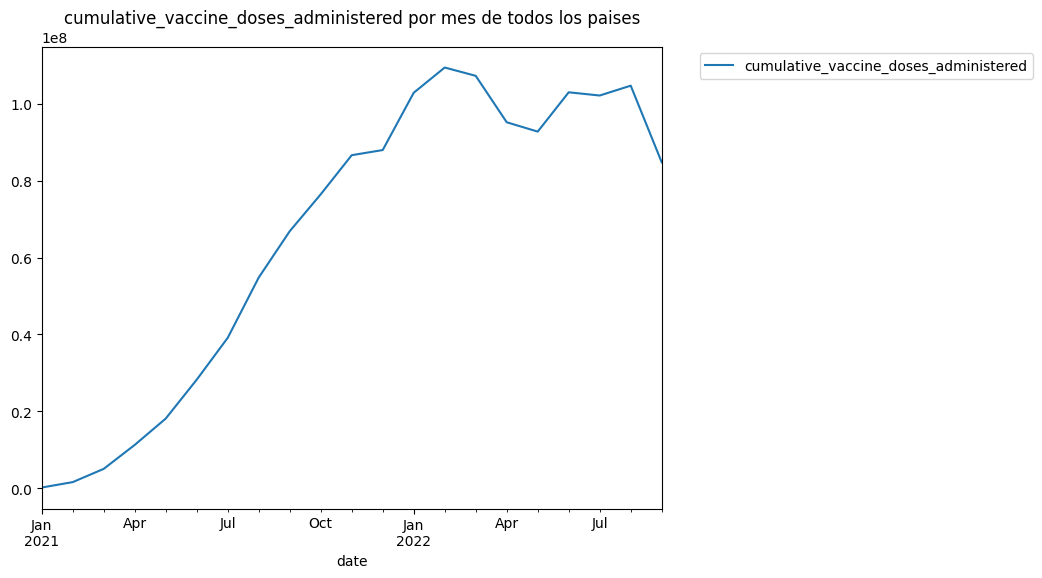

In [72]:
fig,ax=plt.subplots(figsize=(8,6))
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.title('cumulative_vaccine_doses_administered por mes de todos los paises')
plt.show()

El pico de dosis suministrada en los diferentes paises de latinoamerica fue en el mes de febrero - marzo del 2022.

## EVOLUCION DOSIS ADMINISTRADAS EN CADA PAIS X MES

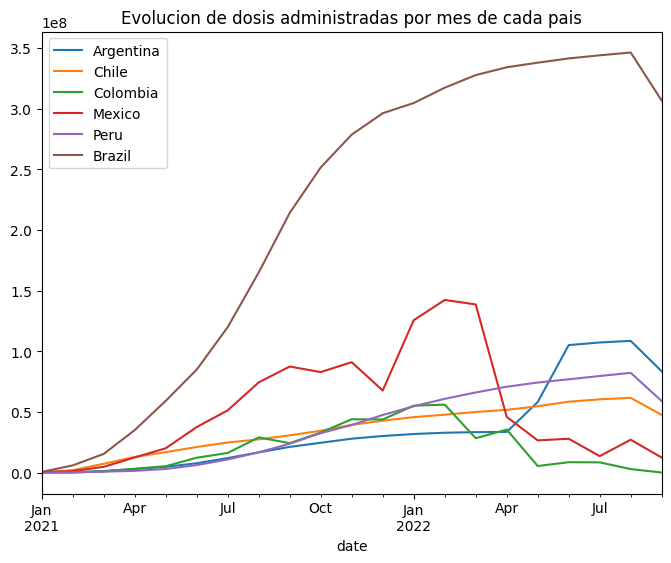

In [77]:
fig, ax=plt.subplots(figsize=(8,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()


plt.title('Evolucion de dosis administradas por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

Se evidencia el aumento de dosis en cad pais al transucurrir el tiempo. hay unos paises que tienen mayor numero de dosis administradas pero 
seria importante evaluar vs la cantidad de poblacion para mirar si se cubre las necesidades por pais.

## MUERTES X MES VS PAIS

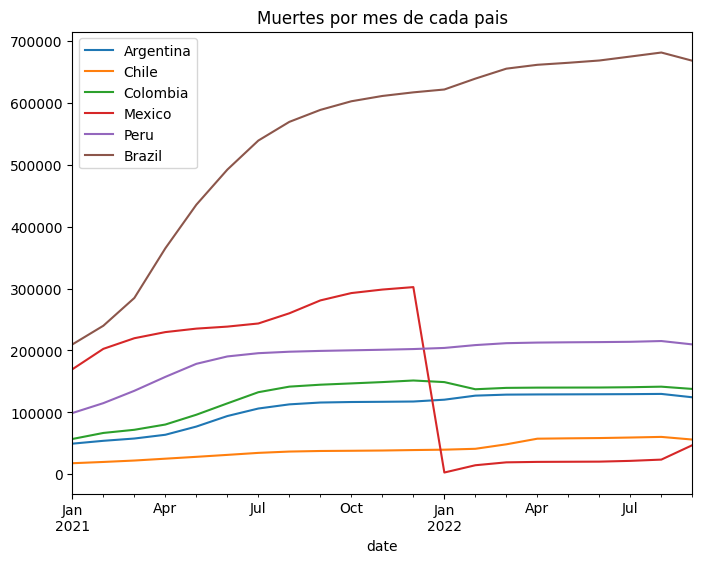

In [78]:
fig, ax=plt.subplots(figsize=(8,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_deceased'].plot()


plt.title('Muertes por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

El pais con mayor numero de muertes fue Brasil, dado que fue el que mas contagiados tuvo.  De resaltar el manejo que Mexico le dio ya que 
se nota una disminucion considerable en los fallecimientos.

## CASOS CONFIRMADOS X MES VS PAIS

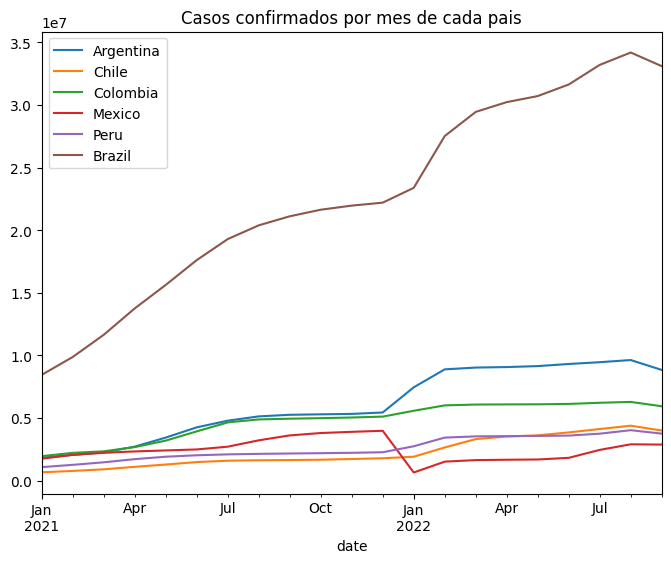

In [79]:
fig, ax=plt.subplots(figsize=(8,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_confirmed'].plot()


plt.title('Casos confirmados por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

El pais con mas casos confirmados es brasil seguido de argentina.  pero como comentaba anteriormente es muy importante saber cual es la poblacion y que 
tan representativa son las cifras.

## RECUPERACIONES DE CASOS POR MES X PAIS

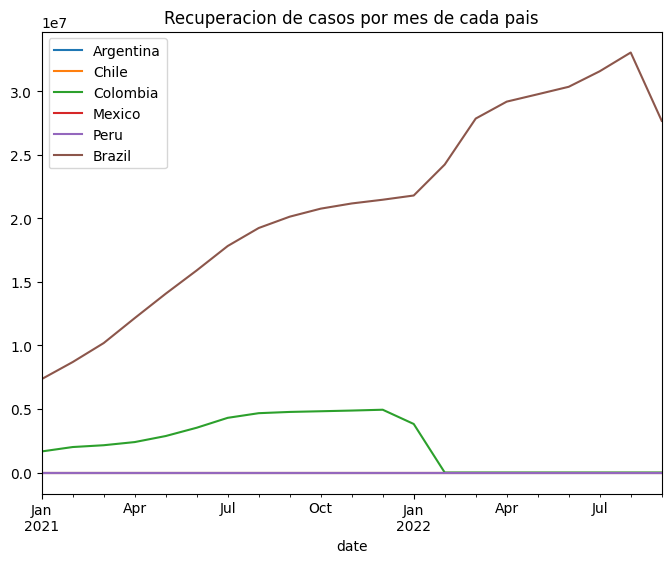

In [80]:
fig, ax=plt.subplots(figsize=(8,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_recovered'].plot()


plt.title('Recuperacion de casos por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

EL pais con mas recuperaciones fue brasil, seugido de chile.

## COMPARACION DE CASOS NUEVOS ENTRE PAISES

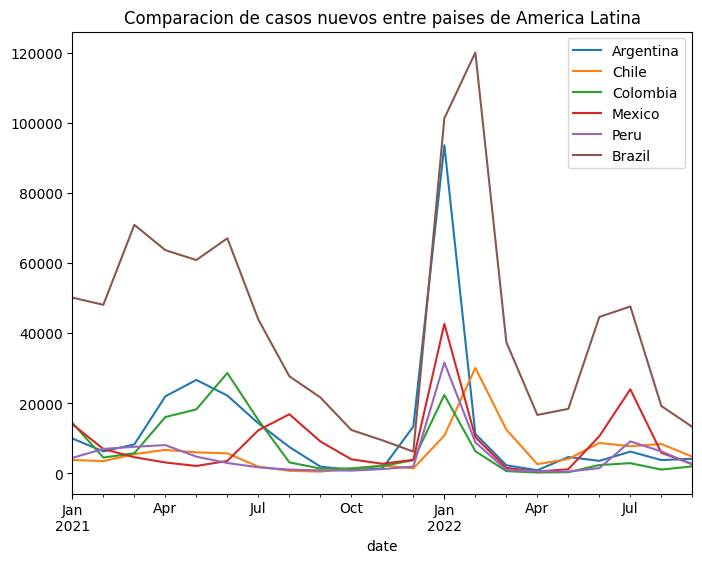

In [81]:
fig, ax=plt.subplots(figsize=(8,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['new_confirmed'].plot()


plt.title('Comparacion de casos nuevos entre paises de America Latina')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

Lla tendencia es muy semejante  a las demas donde Brasil va con los picos mas altos, seguido de argentina.

## DOSIS ACUMULADAS X PAIS

Text(0.5, 1.0, 'Distribucion de dosis acumuladas por pais')

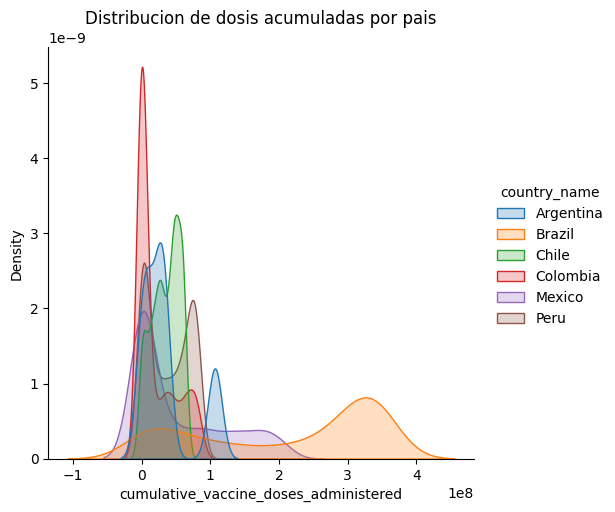

In [82]:
sns.displot(data_latinoamerica_paises,x="cumulative_vaccine_doses_administered",hue="country_name",kind="kde",fill=True)
plt.title('Distribucion de dosis acumuladas por pais')

Cabe resaltar de esta grafica que chile fue de los primeros paises en empezar a distribuir las vacunas y de los ultimos en terminar de suministrar.  

##  BOXPLOT - TEMPERATURA MEDIA DE CADA PAIS

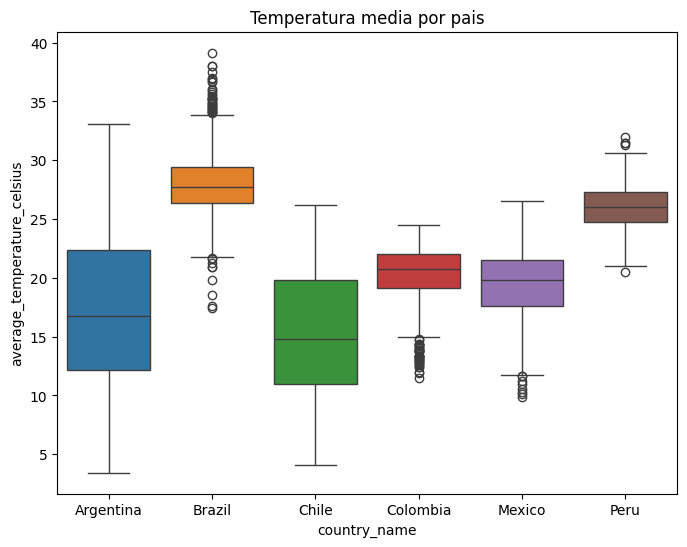

In [83]:
fig,ax=plt.subplots(figsize=(8,6))
sns.boxplot(x='country_name',y='average_temperature_celsius',data=data_latinoamerica_paises,hue='country_name')
plt.title('Temperatura media por pais')
plt.show()


Lo mas notable es el rango de temperetaura en paises como argentina.  Esto es claro debido a que va en gran parte desde el hemisferio sur y va subiendo.
A diferencia de paises como colombia, peru y mexico que son paises mas al centro .

## VIOLIN PLOT - VARIABLES CON CAMBIOS DE VALORES

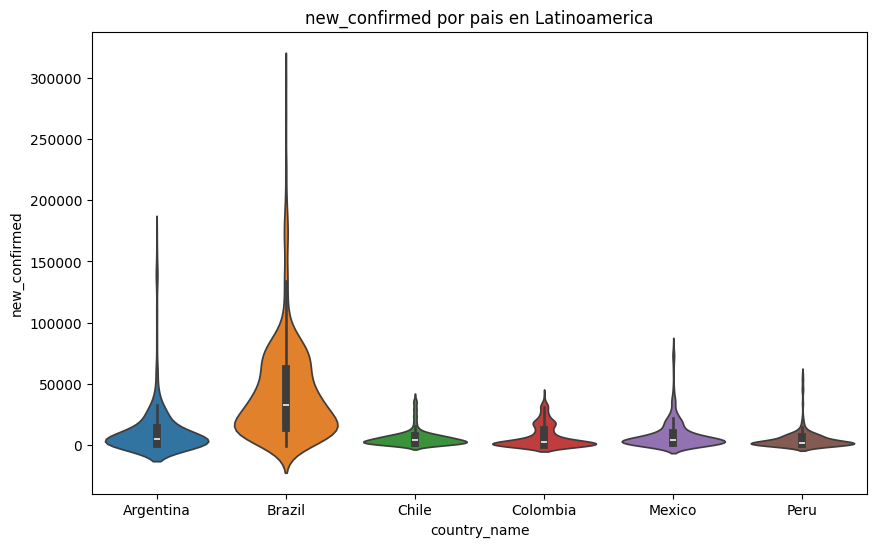

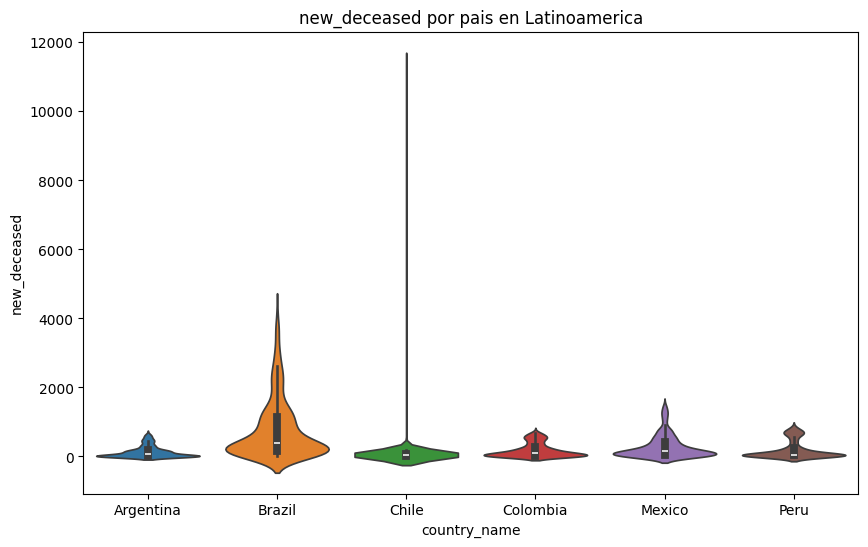

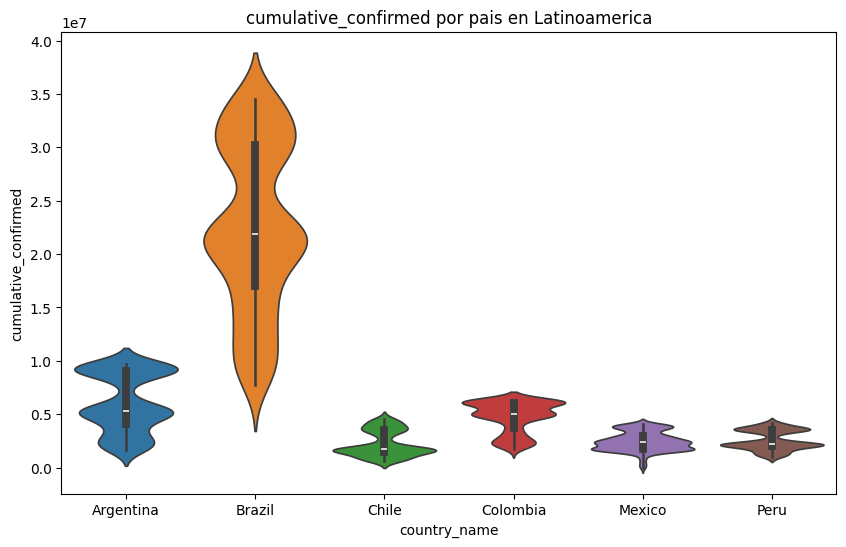

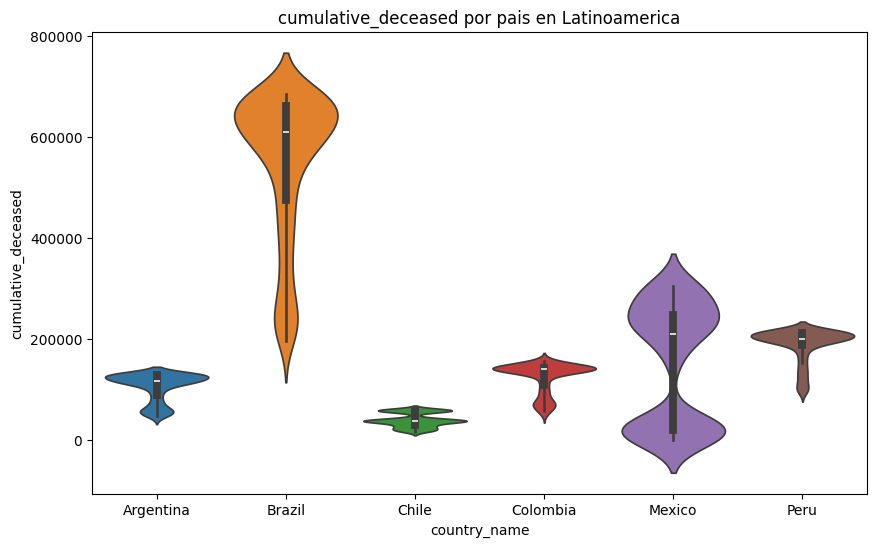

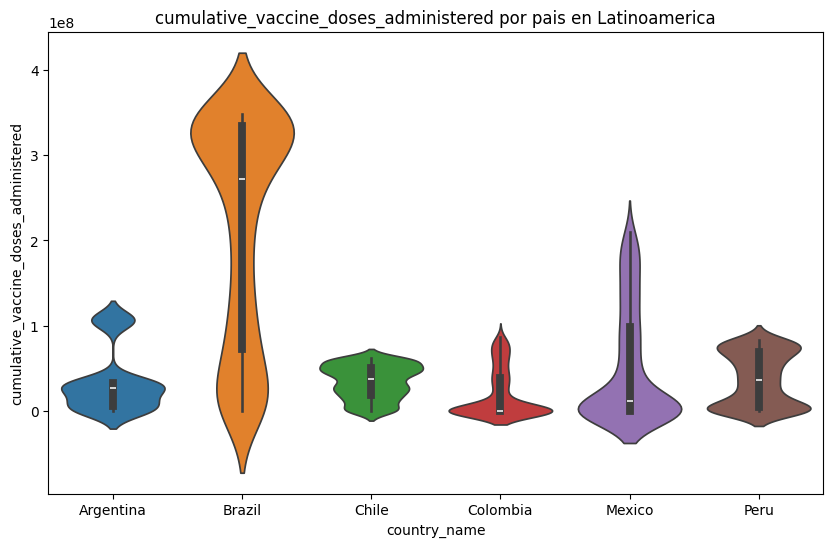

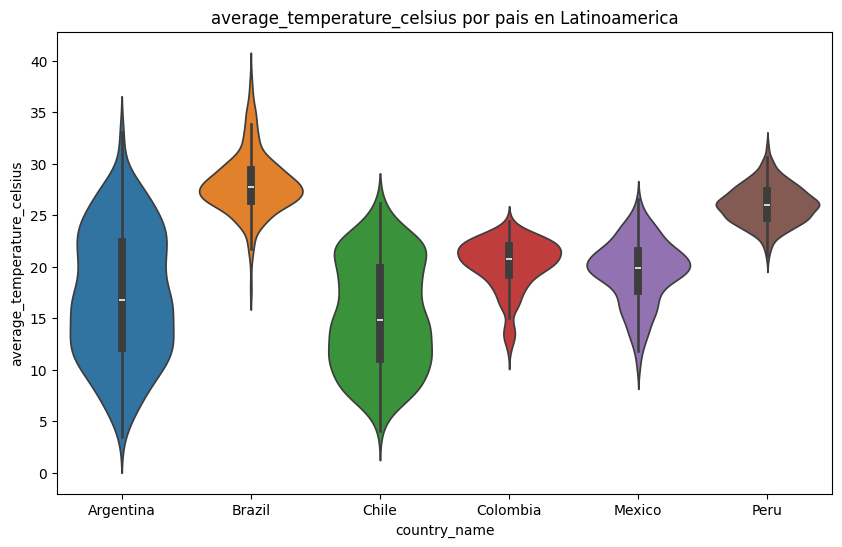

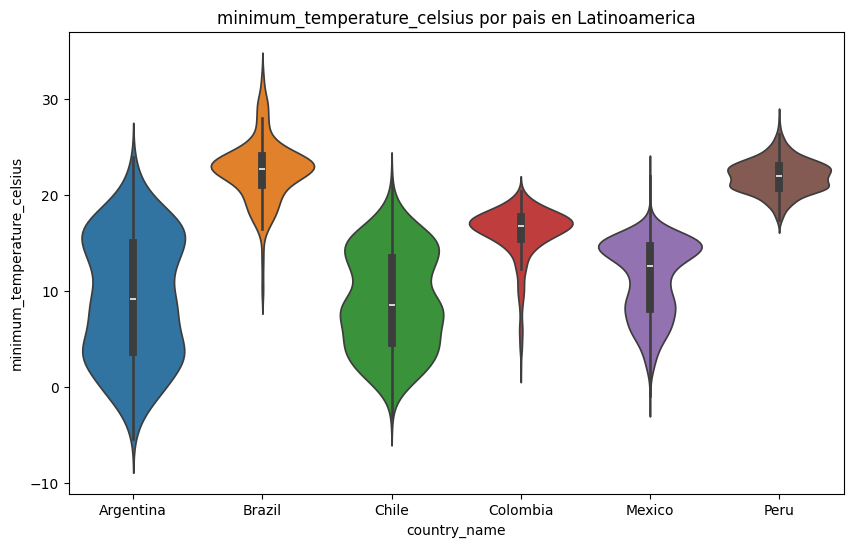

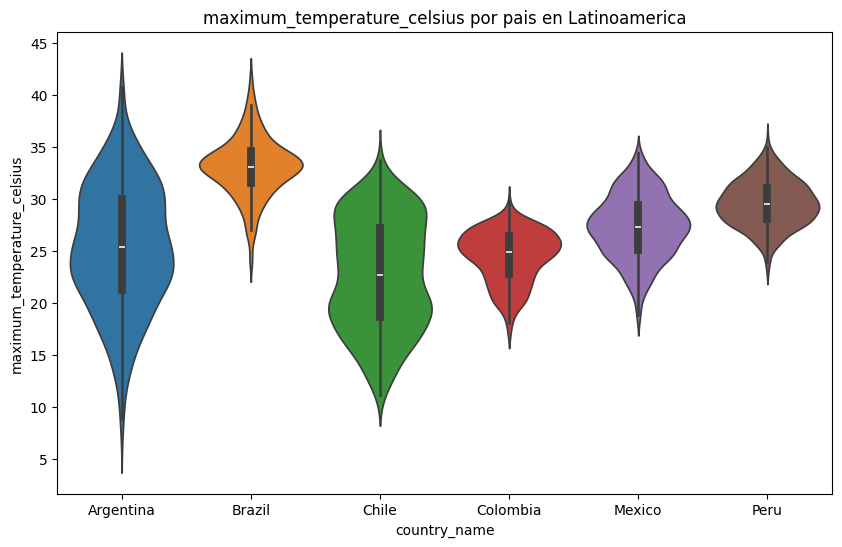

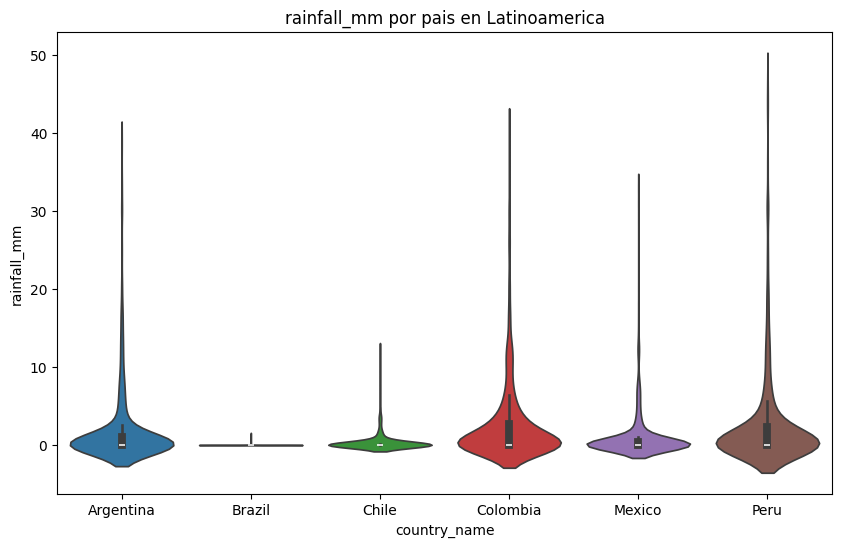

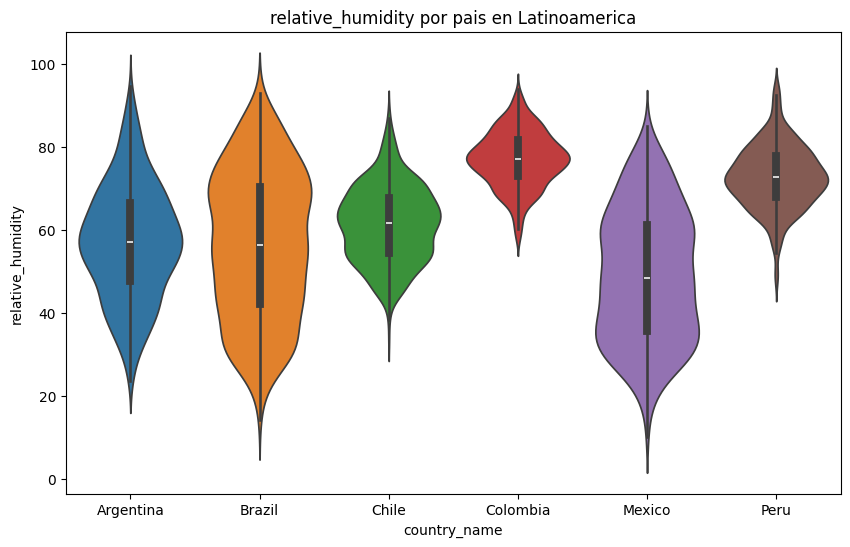

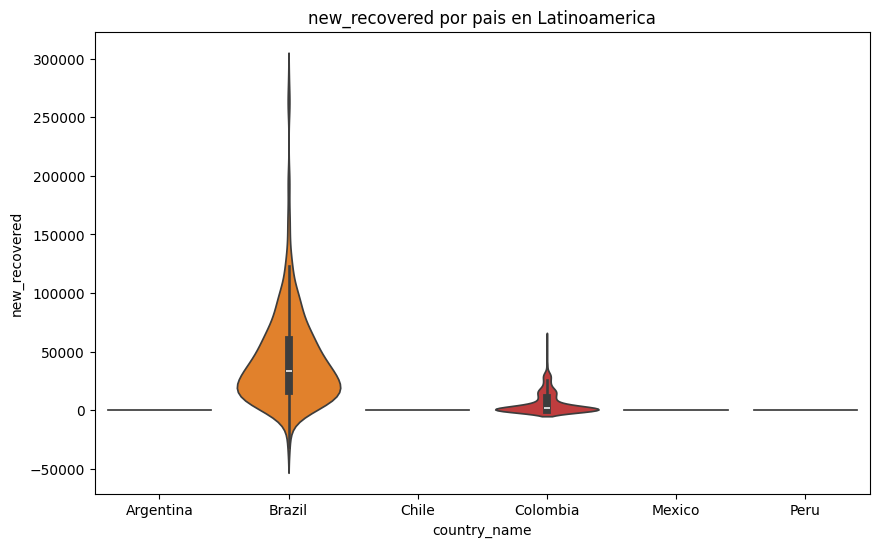

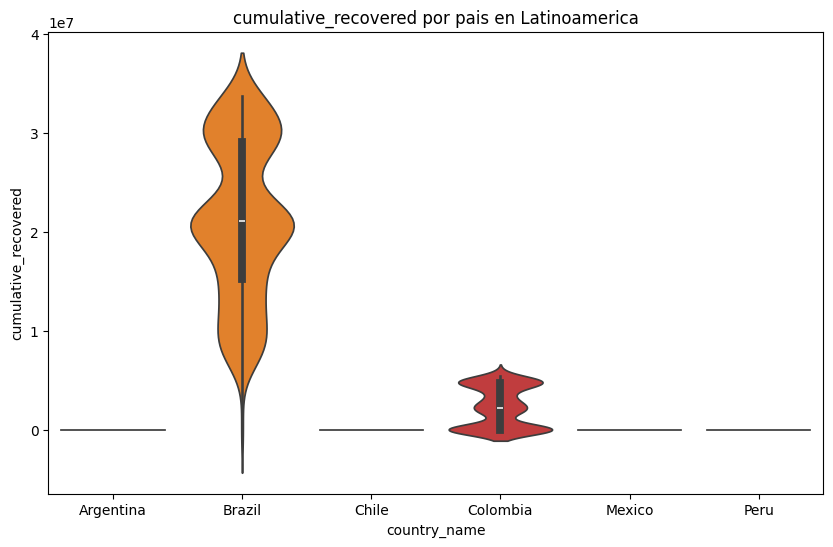

In [85]:
columnas_mayor6=[]
for i in data_latinoamerica_paises.columns:
    if i not in['location_key','date','country_code','latitude','longitude']:
        if data_latinoamerica_paises[i].nunique()>6:
            columnas_mayor6.append(i)


columnas_mayor6.append ('country_name')                      # Se agregan a columnas_mayores_6 la columna country name para hacer analisis por pais.


data_latinoamerica_paises_mayor6=data_latinoamerica_paises[columnas_mayor6] # Se crea un dataframe con las columnas mayores a 6 


for i in data_latinoamerica_paises_mayor6.columns:
    if i not in['location_key','date','country_code','latitude','longitude','country_name']:
        fig,ax=plt.subplots(figsize=(10,6))
        sns.violinplot(x='country_name',y=i,data=data_latinoamerica_paises_mayor6,hue='country_name')
        plt.title(f'{i} por pais en Latinoamerica')
        plt.show()

## DISTRIBUCION POBLACION POR GRUPOS EDAD

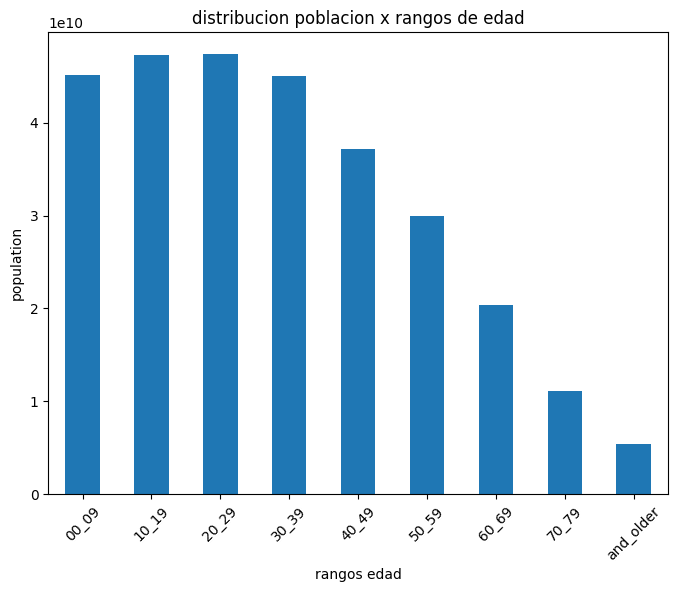

In [91]:
columnas_edad=['population_age_00_09','population_age_10_19','population_age_20_29','population_age_30_39','population_age_40_49','population_age_50_59','population_age_60_69','population_age_70_79','population_age_80_and_older']
distribucion_edad=data_latinoamerica_paises[columnas_edad].sum()
plt.figure(figsize=(8,6))
distribucion_edad.plot(kind='bar',stacked=True)
plt.xlabel('rangos edad')
plt.ylabel('population')
plt.title('distribucion poblacion x rangos de edad')
plt.xticks(range(len(columnas_edad)),[col.split('_')[-2]+'_'+col.split('_')[-1]for col in columnas_edad],rotation=45)
plt.show()

Es clara la grafica al mostrar en donde esta el mayor grupo de la poblacion.  Se evidencia como a mayor edad va disminyendo la poblacion

## MORTALIDAD POR GENERO

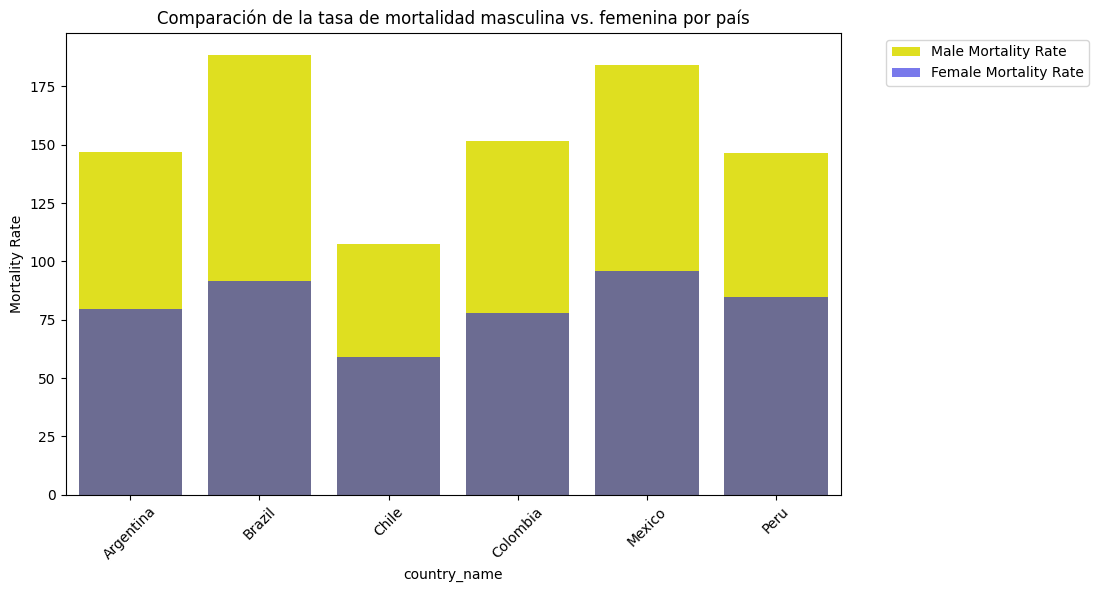

In [93]:
plt.figure(figsize=(10,6))
sns.barplot(data=data_latinoamerica_paises, x='country_name', y='adult_male_mortality_rate', color='yellow', label='Male Mortality Rate')
sns.barplot(data_latinoamerica_paises, x='country_name', y='adult_female_mortality_rate', color='blue', alpha=0.6, label='Female Mortality Rate')
plt.xticks(rotation=45)
plt.ylabel('Mortality Rate')
plt.title('Comparación de la tasa de mortalidad masculina vs. femenina por país')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()

Se evidencia que en todos los paises la mortalidad es mayor,levemente, la de mujeres que la de hombres.  

# MATRIZ DE CORRELACION DE INDICADORES DEMOGRAFICOS Y DE SALUD

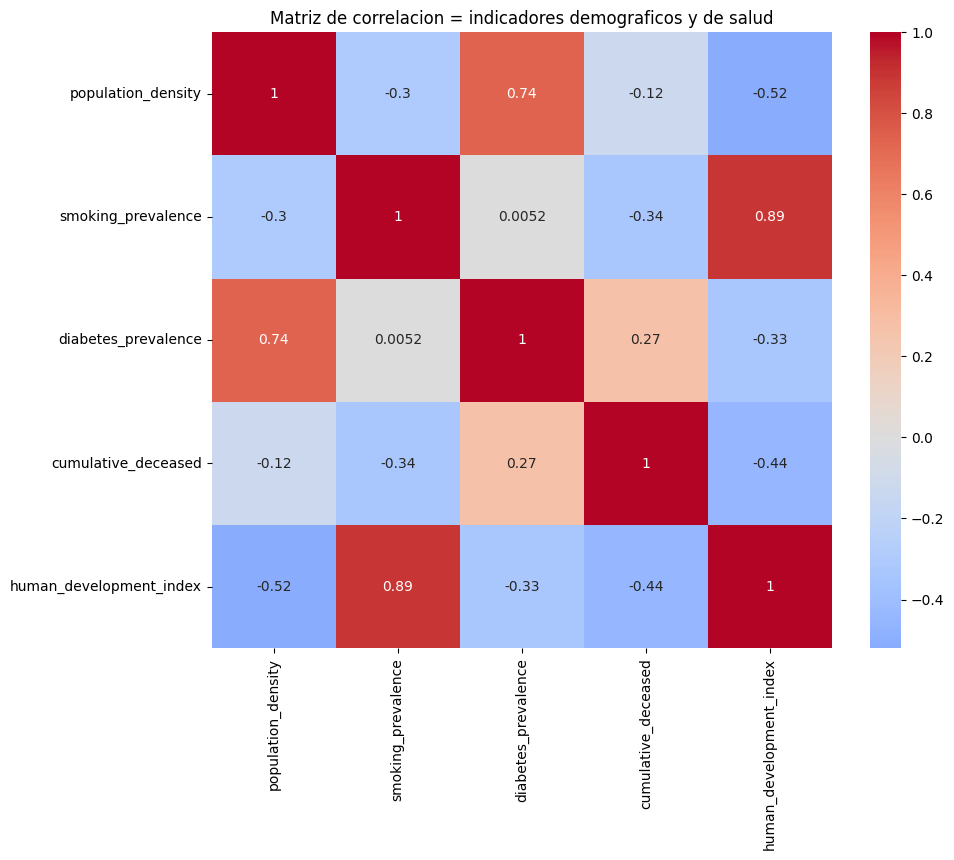

In [94]:
columnasd = ['population_density', 'smoking_prevalence', 'diabetes_prevalence', 'cumulative_deceased', 'human_development_index']
correlation_matrix = data_latinoamerica_paises[columnasd].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlacion = indicadores demograficos y de salud')
plt.show()

Se evidencia que las personas fumadoras son altamente propensas. esto se evidencia ya que de todos los cuadros es el que tiene el indice
de correlacion mas alto.  la diabetes esta como segunda en correlacion.

# COMPARACION PREVELANCIA DIABETES CON LA TASA DE MORTALIDAD

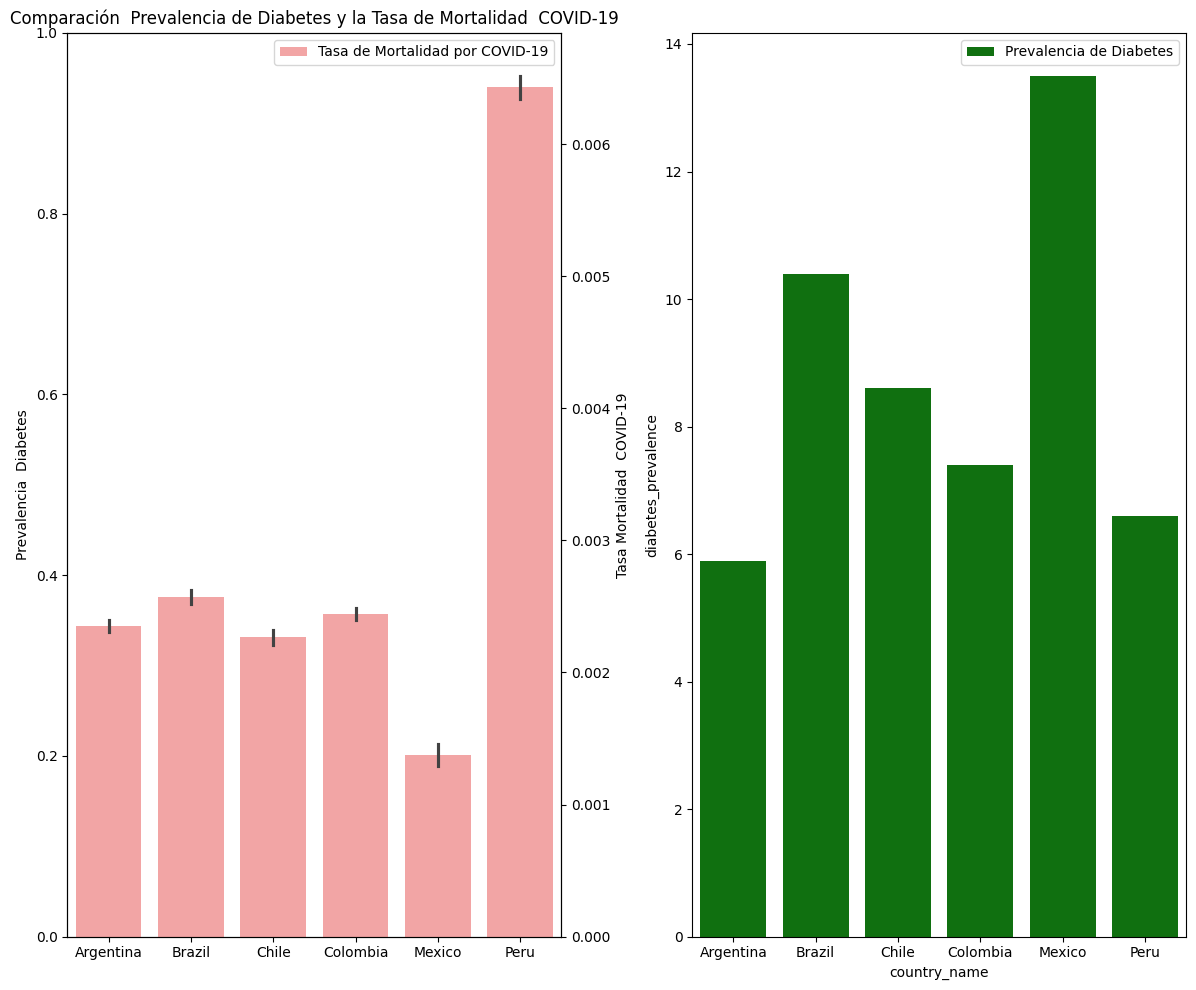

In [97]:
fig, (ax,ax2) = plt.subplots(1, 2, figsize=(12,10))
sns.barplot(data=data_latinoamerica_paises, x=data_latinoamerica_paises['country_name'], y=data_latinoamerica_paises['diabetes_prevalence'], color='green', label='Prevalencia de Diabetes')
ax2 = ax.twinx()
sns.barplot(data=data_latinoamerica_paises, x=data_latinoamerica_paises['country_name'], y= data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['population'], color='red', label='Tasa de Mortalidad por COVID-19', alpha=0.4)
plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia  Diabetes')
ax2.set_ylabel('Tasa Mortalidad  COVID-19')
plt.title('Comparación  Prevalencia de Diabetes y la Tasa de Mortalidad  COVID-19')
plt.tight_layout()
plt.show()

 # AVANCE 3

# EDA CON NUMPY Y 

______________________________

## EVOLUCION DE CASOS ACTIVOS VS RECUPERADOS

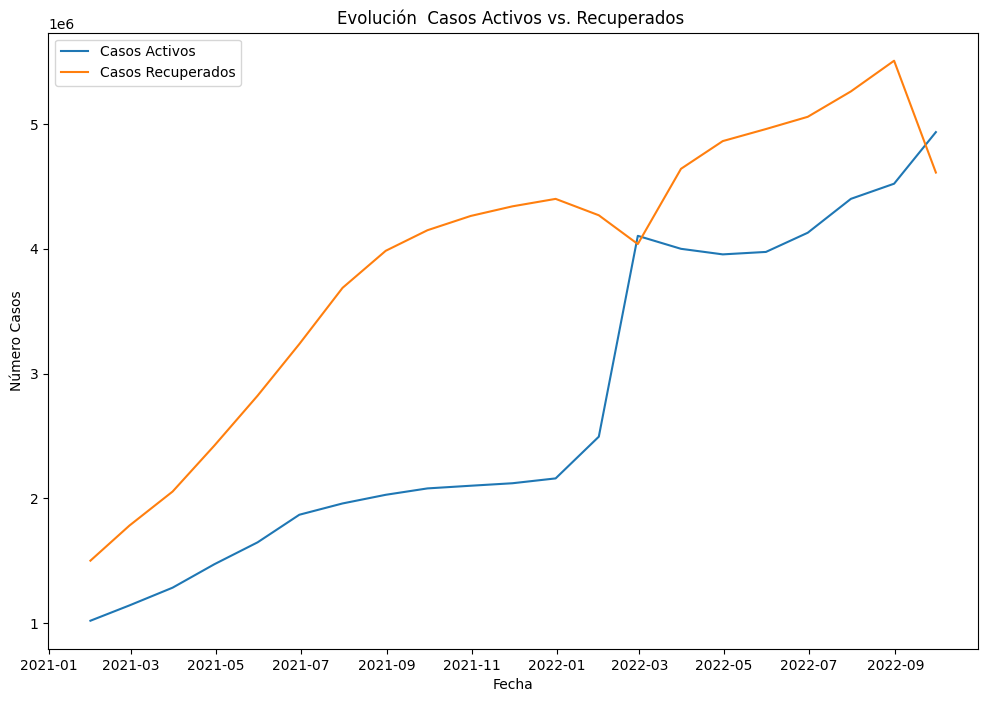

In [102]:
data_latinoamerica_paises['casos_activos'] = data_latinoamerica_paises['cumulative_confirmed'] - data_latinoamerica_paises['cumulative_deceased'] - data_latinoamerica_paises['cumulative_recovered']
plt.figure(figsize=(12, 8))


sns.lineplot(data=data_latinoamerica_paises.resample('ME').mean(numeric_only=True), x='date', y='active_cases', label='Casos Activos')
sns.lineplot(data=data_latinoamerica_paises.resample('ME').mean(numeric_only=True), x='date', y='cumulative_recovered', label='Casos Recuperados')
plt.xlabel('Fecha')
plt.ylabel('Número Casos')
plt.title('Evolución  Casos Activos vs. Recuperados ')
plt.legend()
plt.show()

## TASA DE MORTALIDAD POR PAIS

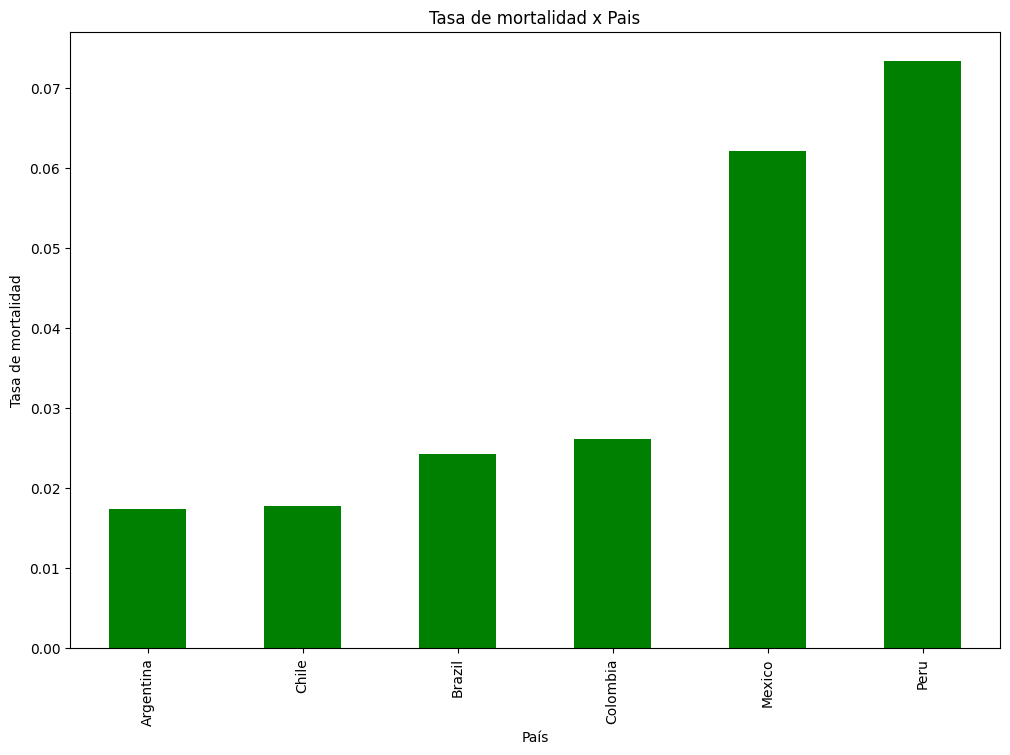

In [107]:
data_latinoamerica_paises['Tasa_de_mortalidad']=data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed']
fatality_rates=data_latinoamerica_paises.groupby('country_name')['Tasa_de_mortalidad'].last().sort_values()



plt.figure(figsize=(12, 8))
fatality_rates.plot(kind='bar', color='green')

plt.xlabel('País')
plt.ylabel('Tasa de mortalidad')
plt.title('Tasa de mortalidad x Pais')
plt.show()

## RELACION COBERTURA DE VACUNACION Y REDUCCION DE LOS CASOS

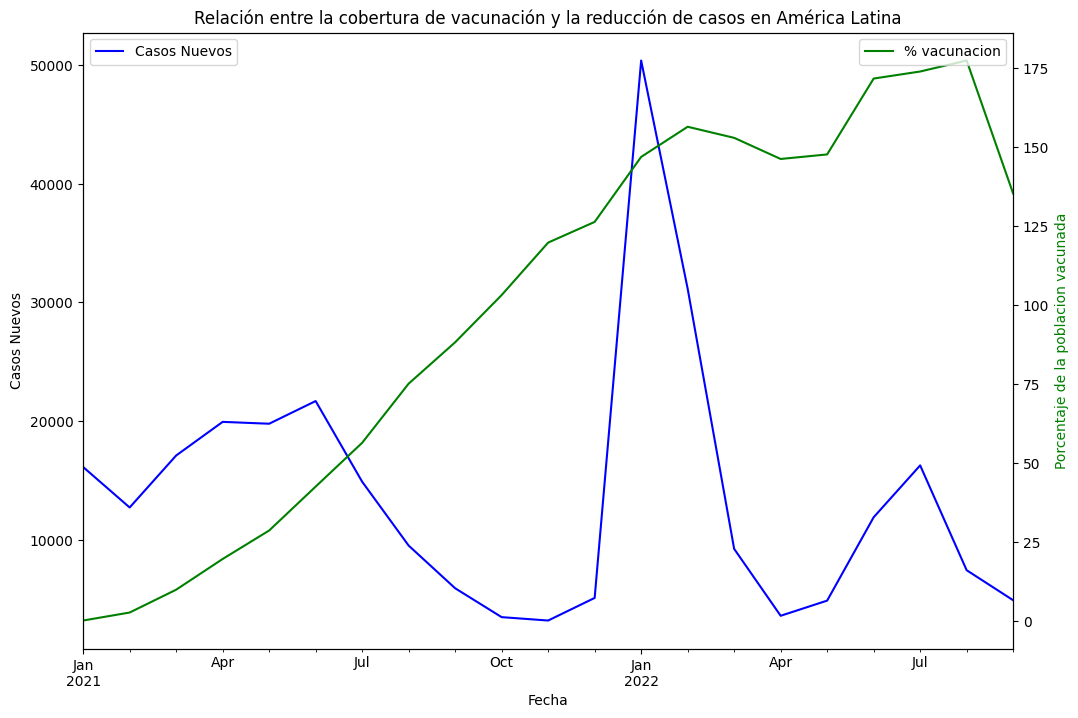

In [110]:
plt.figure(figsize=(12, 8))
ax1=plt.gca()
ax2= ax1.twinx()


#Porcentaje de vacunación
data_latinoamerica_paises['porcentaje_vacunacion'] = (data_latinoamerica_paises['cumulative_vaccine_doses_administered'] / data_latinoamerica_paises['population']) * 100
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='blue', label='Casos Nuevos')
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['percentage_vaccinated'].plot(ax=ax2, color='green', label='% vacunacion')


ax1.set_xlabel('Fecha')
ax1.set_ylabel('Casos Nuevos', color='black')
ax2.set_ylabel('Porcentaje de la poblacion vacunada', color='green')
ax1.set_title('Relación entre la cobertura de vacunación y la reducción de casos en América Latina')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

## PROGRESO DE LA VACUNACION POR PAIS

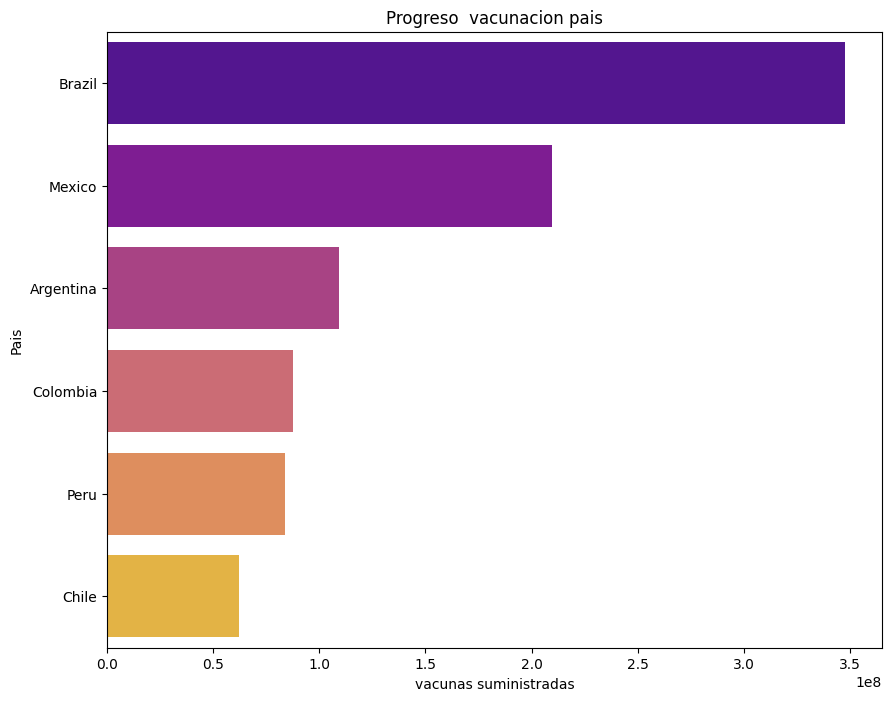

In [119]:
vacunacion_pais = data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=vacunacion_pais.values, y=vacunacion_pais.index, hue=vacunacion_pais.index, palette='plasma')
plt.xlabel('vacunas suministradas')
plt.ylabel('Pais')
plt.title('Progreso  vacunacion pais')
plt.show()

## RELACION ENTRE NUEVOS CASOS Y TEMPERATURA PROMEDIO

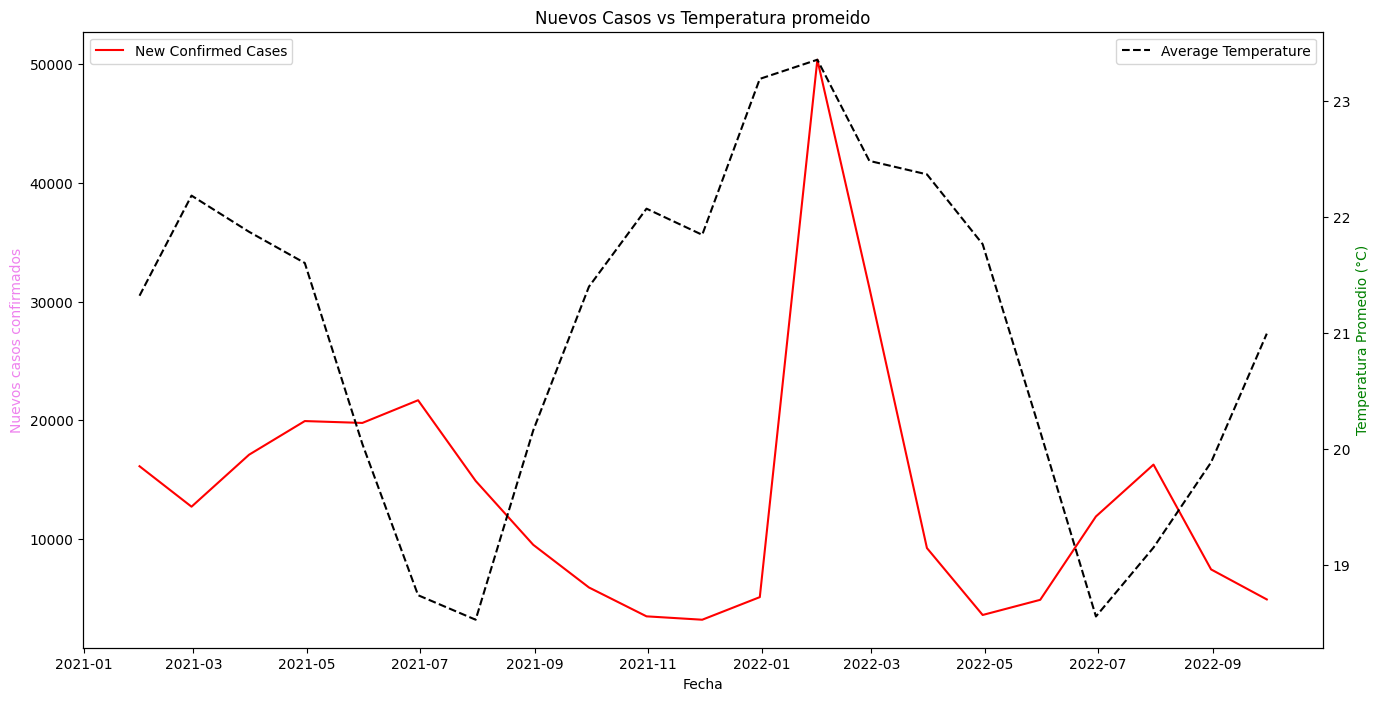

In [124]:
plt.figure(figsize=(16, 8))
ax1 = plt.gca()
ax2 = ax1.twinx()


ax1.plot(data_latinoamerica_paises.resample('ME').mean(numeric_only=True).index, data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['new_confirmed'], color='red', label='New Confirmed Cases')
ax2.plot(data_latinoamerica_paises.resample('ME').mean(numeric_only=True).index, data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['average_temperature_celsius'], color='black', label='Average Temperature', linestyle='--')


ax1.set_xlabel('Fecha')
ax1.set_ylabel('Nuevos casos confirmados', color='violet')
ax2.set_ylabel('Temperatura Promedio (°C)', color='green')
plt.title('Nuevos Casos vs Temperatura promeido')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

## IMPACTO DE LA URBANIZACION

C:\Users\ELITE PADEL\AppData\Local\Temp\ipykernel_7952\787860806.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=urban_cases['urban_population_percentage'], y=urban_cases.index, palette='deep')


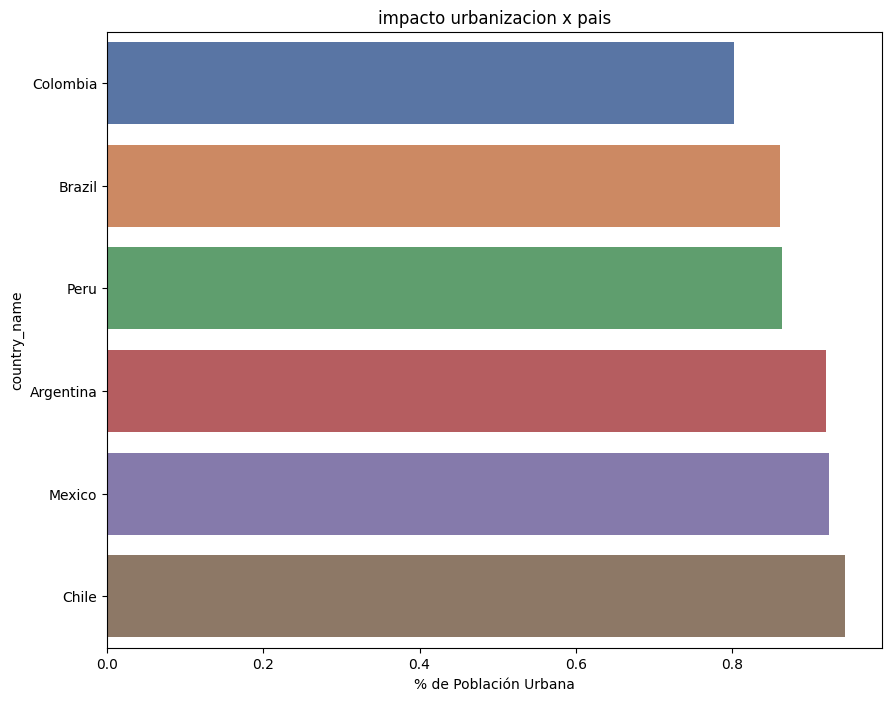

In [127]:
data_latinoamerica_paises['urban_population_percentage'] =data_latinoamerica_paises['population_urban'] / data_latinoamerica_paises['population']
urban_cases = data_latinoamerica_paises.groupby('country_name').last().sort_values(by='urban_population_percentage')


plt.figure(figsize=(10, 8))
sns.barplot(x=urban_cases['urban_population_percentage'], y=urban_cases.index, palette='deep')
plt.xlabel('% de Población Urbana')
plt.title('impacto urbanizacion x pais')
plt.show()

## EVOLUCION SEMANAL DE CASOS NUEVOS

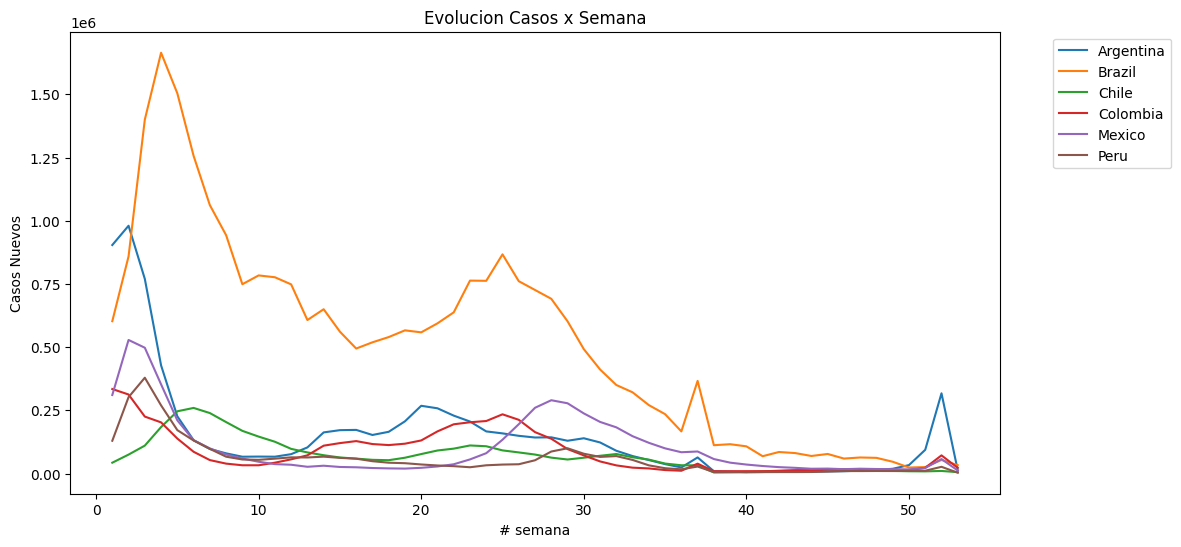

In [136]:
data_latinoamerica_paises['semana']=data_latinoamerica_paises.index.isocalendar().week
data_latinoamerica_paises['año'] = data_latinoamerica_paises.index.isocalendar().year
weekly_cases = data_latinoamerica_paises.groupby(['country_name','week'])['new_confirmed'].sum().reset_index()
plt.figure(figsize=(12, 6))
for country in weekly_cases['country_name'].unique():
    country_weekly_cases = weekly_cases[weekly_cases['country_name'] == country]
    plt.plot(country_weekly_cases['week'], country_weekly_cases['new_confirmed'], label=country)

plt.xlabel('# semana')
plt.ylabel('Casos Nuevos')
plt.title('Evolucion Casos x Semana')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## EVOLUCION ANUAL DE CASOS NUEVOS

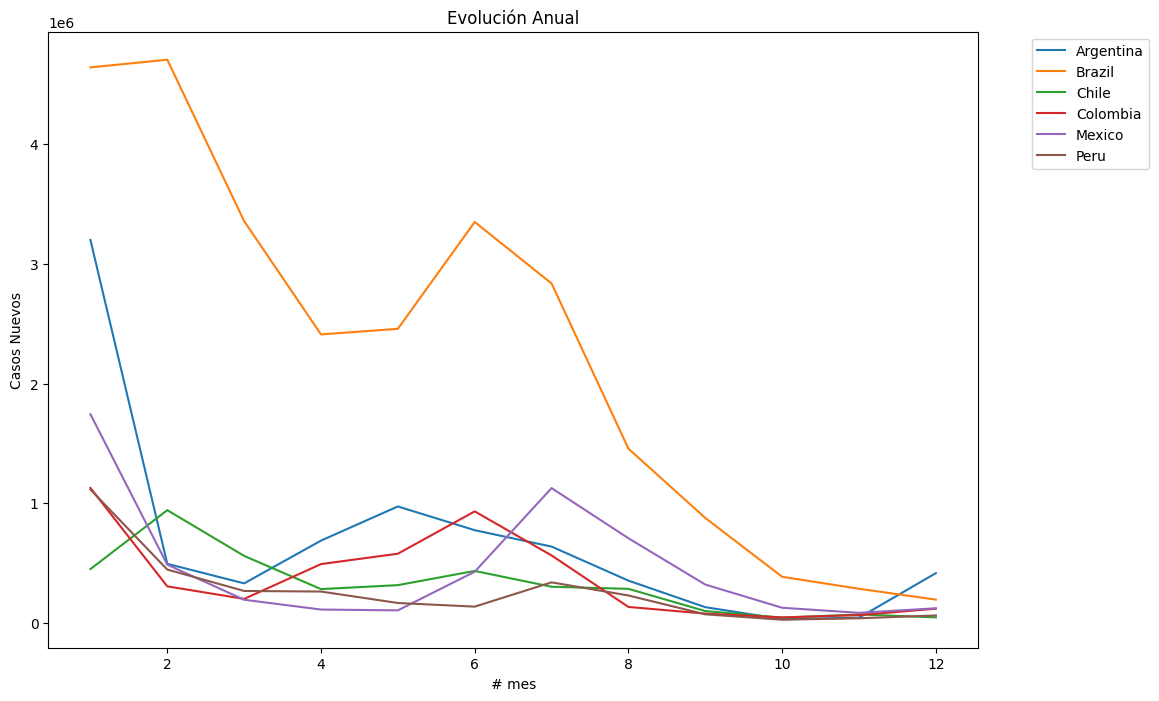

In [141]:
data_latinoamerica_paises['month'] = data_latinoamerica_paises.index.month
yearly_cases = data_latinoamerica_paises.groupby(['country_name','month'])['new_confirmed'].sum().reset_index()
plt.figure(figsize=(12, 8))
for country in yearly_cases['country_name'].unique():
    country_yearly_cases = yearly_cases[yearly_cases['country_name'] == country]
    plt.plot(country_yearly_cases['month'], country_yearly_cases['new_confirmed'], label=country)

plt.xlabel('# mes')
plt.ylabel('Casos Nuevos')
plt.title('Evolución Anual')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## COMPARACION DE ESTRATEGIAS DE VACUNACION X PAIS

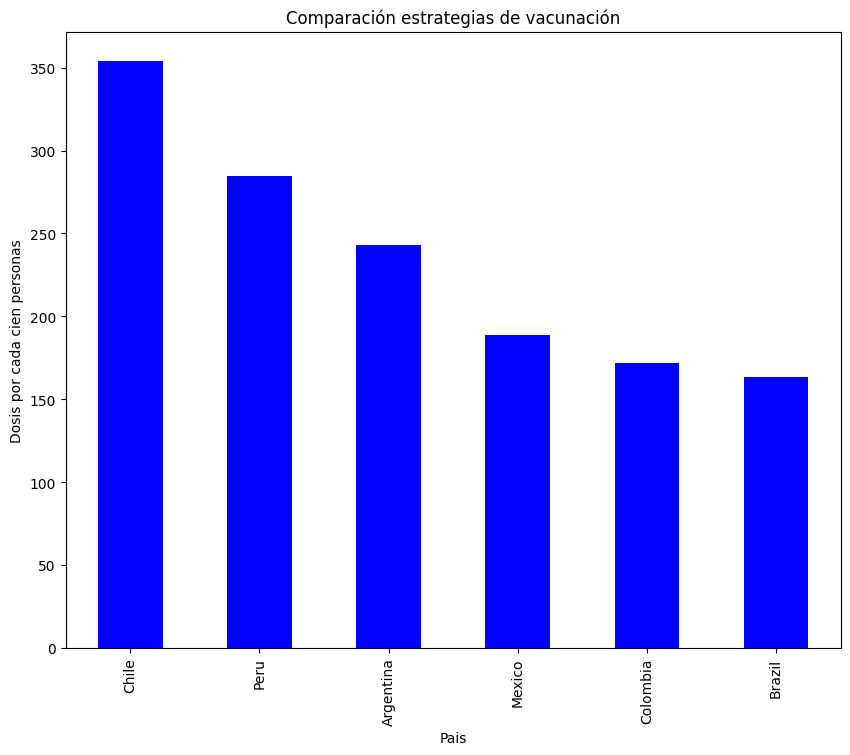

In [145]:
estrategia_vacunacion = data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / data_latinoamerica_paises.groupby('country_name')['population'].max() * 100
estrategia_vacunacion.sort_values(ascending=False).plot(kind='bar', figsize=(10, 8), color='blue')
plt.xlabel('Pais')
plt.ylabel('Dosis por cada cien personas')
plt.title('Comparación estrategias de vacunación')
plt.show()

## PREVALENCIA CONDICIONES PREEXISTENTES - FUMAR

In [152]:
paises_evaluar =data_latinoamerica_paises.groupby('country_name')['cumulative_deceased'].max().nlargest(5).index
paises_relacion = data_latinoamerica_paises.groupby('country_name')['cumulative_deceased'].max().nsmallest(5).index
resultado_condicion = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(paises_evaluar.union(paises_relacion))]

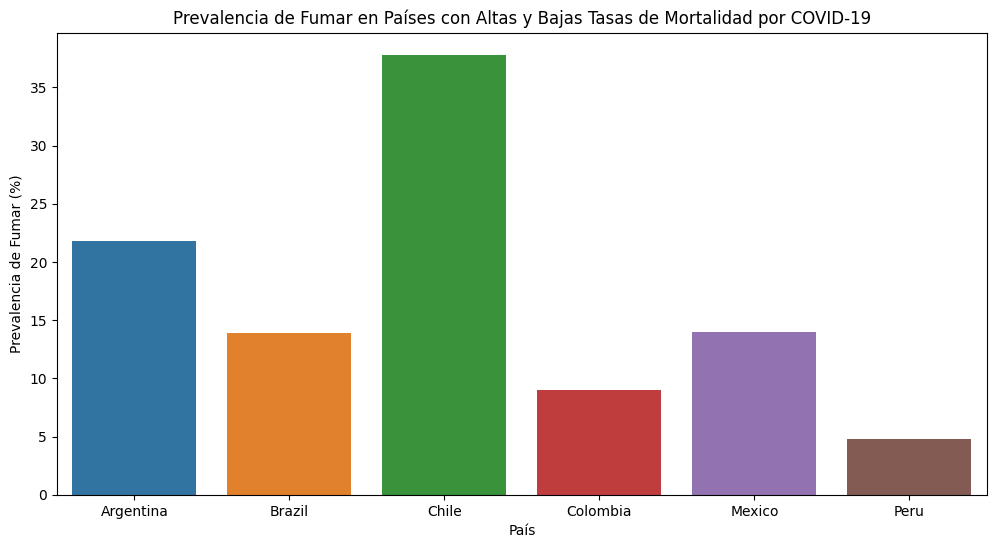

In [149]:
plt.figure(figsize=(12, 6))
sns.barplot(data=conditions_data, x='country_name', y='smoking_prevalence', hue='country_name')
plt.xlabel('País')
plt.ylabel('Prevalencia de Fumar (%)')
plt.title('Prevalencia de Fumar X Países con Altas y Bajas Tasas de Mortalidad ')
plt.show()

## ANALISIS DE MORTALIDAD

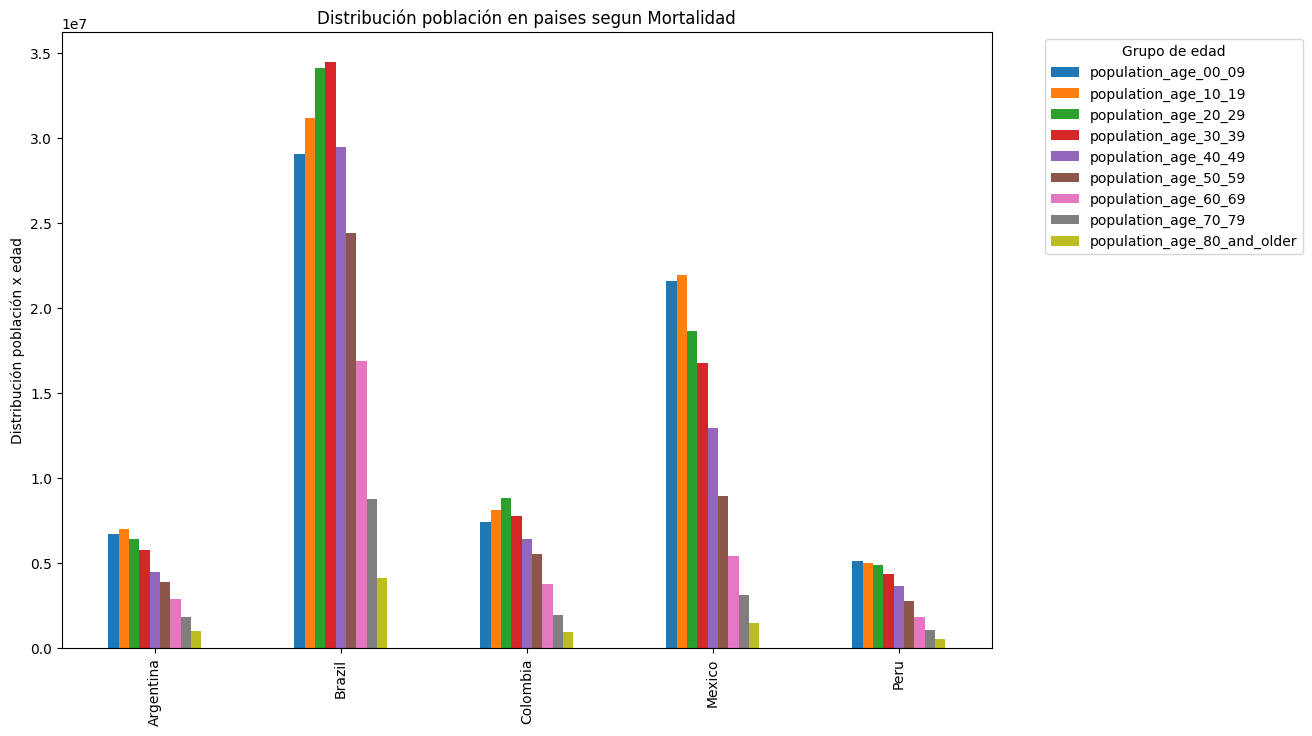

In [161]:
mortalidad_pais = data_latinoamerica_paises.groupby('country_name')['cumulative_deceased'].max().sort_values(ascending=False).head(5).index
grupo_edad = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
distribucion_edades = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(mortalidad_pais)].groupby('country_name')[grupo_edad].mean()



distribucion_edades.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.xlabel('')
plt.ylabel('Distribución población x edad')
plt.title('Distribución población en paises segun Mortalidad')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Grupo de edad')
plt.show()

## ANALISIS TEMPORAL MORTALIDAD

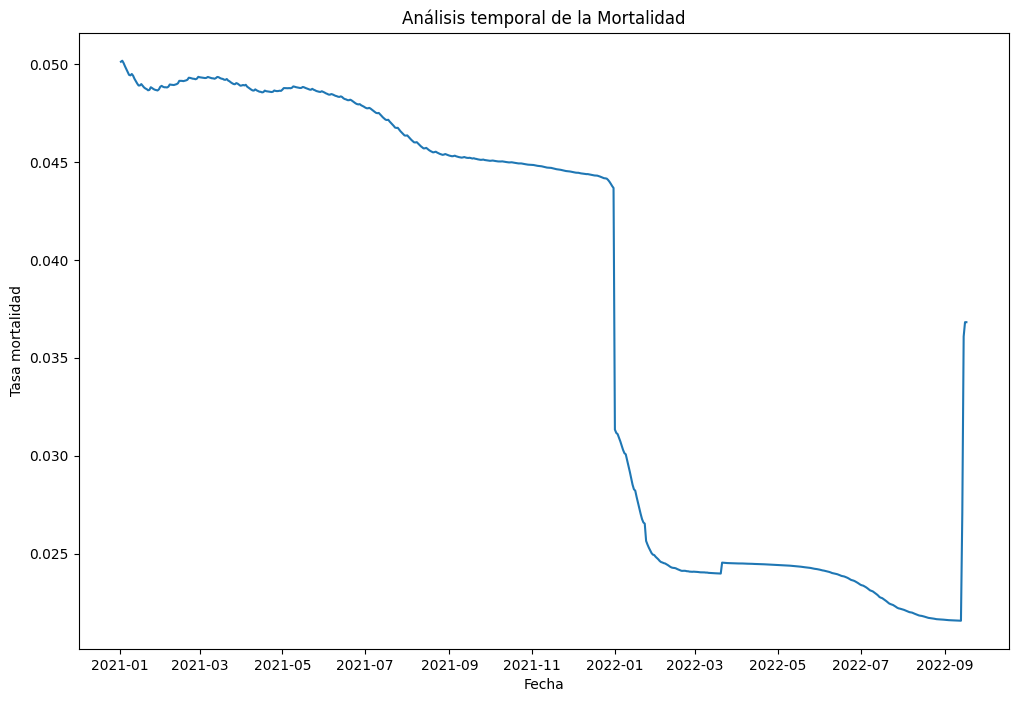

In [166]:
data_latinoamerica_paises['Tasa mortalidad']= data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed']

plt.figure(figsize=(12, 8))
sns.lineplot(data=data_latinoamerica_paises, x='date', y='mortality_rate', estimator='mean', errorbar=None)
plt.xlabel('Fecha')
plt.ylabel('Tasa mortalidad')
plt.title('Análisis temporal de la Mortalidad')
plt.show()